#Abstract

The purpose of this analysis is to look into the Poker Hand Data set and analyze the strenght of each hand as a classification exercise. This dataset has already been devided into two sets of train and test dataset. Hence there is no need to split the data before starting the analysis.

UCI Machine Leaning Repository describes the dataset as following:

"Each record is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the Poker Hand. The order of cards is important, which is why there are 480 possible Royal Flush hands as compared to 4.


Attribute Information:

1) S1 "Suit of card #1" 
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs} 

2) C1 "Rank of card #1" 
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) 

3) S2 "Suit of card #2" 
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs} 

4) C2 "Rank of card #2" 
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) 

5) S3 "Suit of card #3" 
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs} 

6) C3 "Rank of card #3" 
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) 

7) S4 "Suit of card #4" 
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs} 

8) C4 "Rank of card #4" 
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) 

9) S5 "Suit of card #5" 
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs} 

10) C5 "Rank of card 5" 
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King) 

11) CLASS "Poker Hand" 
Ordinal (0-9) 

0: Nothing in hand; not a recognized poker hand 
1: One pair; one pair of equal ranks within five cards 
2: Two pairs; two pairs of equal ranks within five cards 
3: Three of a kind; three equal ranks within five cards 
4: Straight; five cards, sequentially ranked with no gaps 
5: Flush; five cards with the same suit 
6: Full house; pair + different rank three of a kind 
7: Four of a kind; four equal ranks within five cards 
8: Straight flush; straight + flush 
9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush" 

We first started with Data Preparation and Pre-prediction Exploratory Data Analysis. For that we made use of functions such as “describe( )” which helps to view some basic statiscital details of our data set, “shape” which returns the dimesions of our dataset, “info” which gives the summary of our dataset and “head( )” which shows the data of the top five rows from our dataset.
We have also plotted the histogram for each of our test and train dataset. The results of this exploratory analysis allowed us to become familiar with our dataset before starting the pipeline process.


To build the pipeline, the data were normalized using “StandardScaler( )”.
This function helps us to make sure that all of our dataset features have the same weight and importance.

Since the category membership of our dataset is known, we are going to use the classification technique on our dataset. We have used models such KNN, SVM, RandomForest, Adaboost, Gradient Boosting and Bagging to analyze the dataset, find their accuracy and predict the labels.

Before fitting the data into the models, hyperparameters were used to train the data even more effectively.

The accuracy of each model was plotted and the results show that _________ has the highest acuuracy to predicate the correct strength of the poker hand compared to other models that we have used.

In [0]:
import pandas as pd
import numpy as np
from sklearn import tree, svm
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [0]:
#load in test/train datasets
train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data', header=None)
test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data', header=None)


In [0]:
#create column headers
train.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5','Label']
test.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5','Label']

#Train set inspection

In [0]:
train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
S1       25010 non-null int64
C1       25010 non-null int64
S2       25010 non-null int64
C2       25010 non-null int64
S3       25010 non-null int64
C3       25010 non-null int64
S4       25010 non-null int64
C4       25010 non-null int64
S5       25010 non-null int64
C5       25010 non-null int64
Label    25010 non-null int64
dtypes: int64(11)
memory usage: 2.1 MB


In [0]:
train.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [0]:
train.shape

(25010, 11)

#Test set inspection

In [0]:
test.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
S1       1000000 non-null int64
C1       1000000 non-null int64
S2       1000000 non-null int64
C2       1000000 non-null int64
S3       1000000 non-null int64
C3       1000000 non-null int64
S4       1000000 non-null int64
C4       1000000 non-null int64
S5       1000000 non-null int64
C5       1000000 non-null int64
Label    1000000 non-null int64
dtypes: int64(11)
memory usage: 83.9 MB


In [0]:
test.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500493,6.997927,2.499894,7.006097,2.500871,6.998873,2.500393,7.002298,2.499451,6.989481,0.616902
std,1.117768,3.743374,1.118568,3.743481,1.118225,3.741890,1.117245,3.741270,1.118948,3.739894,0.773377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [0]:
test.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [0]:
test.shape


(1000000, 11)

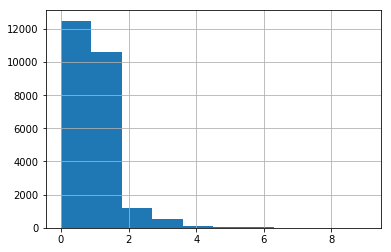

In [0]:
train['Label'].hist()

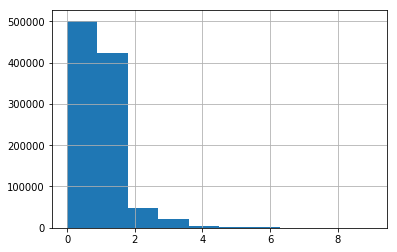

In [0]:
test['Label'].hist()

#Extract features and labels


In [0]:
X_train = train.loc[:,train.columns != 'Label']
X_test = test.loc[:,test.columns != 'Label']

###Scaling the Data


In [0]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)  

# Transform the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_train = train['Label']
y_test = test['Label']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


###KNearestNeighbours

Another model that we decided to investigate for this classification model is the K-Nearest Neighbor. We used the param_grids hyperparameters of n_neighbors 'leaf_size' and ‘n_jobs'. Also we tested 2 cross validations of CV=3 and 10 for this model and it resulted in CV=10 providing slightly better accuracy.

**CV=3**

In [0]:
#Instantiating the KNN model
knn = KNeighborsClassifier()
param_grid_KNN ={'n_neighbors':[5,10,40,80,100,150,200],
          'leaf_size':[1,2,3,5],
          'n_jobs':[-1]}
model_names = ["KNN"]
knn_grid_search3 = RandomizedSearchCV(estimator = knn, param_distributions = param_grid_KNN, 
                            cv = 3, n_jobs = -1, verbose = 2)
#Computing 3-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(knn_grid_search3, X_train, y_train, cv=3)
print(cv_scores)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.8min finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.2min finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.2min finished


[0.54545455 0.54360082 0.54265147]


In [0]:
#fitting the KNN model
knn_grid_search3.fit(X_train, y_train)
print(knn_grid_search3.best_params_)
best_random =knn_grid_search3.best_estimator_
best_random.fit(X_train, y_train)
y_pred3=best_random.predict(X_test)

#print Accuracy
acc = accuracy_score(y_test, y_pred3)
print("Accuracy Using" + str(acc)+'\n')
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test, y_pred3))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
{'n_neighbors': 150, 'n_jobs': -1, 'leaf_size': 1}
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.3min finished

Accuracy Using0.547687

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
              precision    recall  f1-score   support

           0       0.56      0.81      0.66    501209
           1       0.51      0.33      0.40    422498
           2       0.00      0.00      0.00     47622
           3       0.00      0.00      0.00     21121
           4       0.00      0.00      0.00      3885
           5       0.00      0.00      0.00      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    micro avg       0.55      0.55      0.55   1000000
    macro avg       0.11      0.11      0.11   1000000
    weighted avg       0.50      0.55      0.50   1000000

     [[406572  94637      0      0      0      0      0      0      0      0]
       [281383 141115      0      0      0      0      0      0      0      0]
       [ 25798  21824      0      0      0      0      0      0      0      0]
       [  8674  12447      0      0      0      0      0      0      0      0]
       [   434   3451      0      0      0      0      0      0      0      0]
       [  1848    148      0      0      0      0      0      0      0      0]
       [   508    916      0      0      0      0      0      0      0      0]
       [    20    210      0      0      0      0      0      0      0      0]
       [     4      8      0      0      0      0      0      0      0      0]
       [     3      0      0      0      0      0      0      0      0      0]]

In [0]:
#setup arrays to store train and test accuracies for CV=3
n_neighbors_KNN = [5,10,40,80,100,150,200]
train_accuracy = np.empty(len(n_neighbors_KNN))
test_accuracy = np.empty(len(n_neighbors_KNN))

#loop over different values of k
for i, k in enumerate(n_neighbors_KNN):
    #setup a Random forest Classifier with k neighbors: clf
    clf_KNN = RandomizedSearchCV(estimator = KNeighborsClassifier(k), param_distributions = param_grid_KNN, 
                            cv = 3, n_jobs = -1, verbose = 2)

    #fit the classifier to the training data
    clf_KNN.fit(X_train, y_train)
    
    #compute accuracy on the training set
    train_accuracy[i] = clf_KNN.score(X_train, y_train)

    #compute accuracy on the testing set
    test_accuracy[i] = clf_KNN.score(X_test, y_test)

#generate plot CV=3
plt.title('KNN: Varying Number of estimators')
plt.plot(n_neighbors_KNN, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_neighbors_KNN, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Fitting 3 folds for each of 10 candidates, totalling 30 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak. "timeout or by a memory leak.", UserWarning
  
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.3min finished

Fitting 3 folds for each of 10 candidates, totalling 30 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
  
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.7min finished

Fitting 3 folds for each of 10 candidates, totalling 30 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
  
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.3min finished

Fitting 3 folds for each of 10 candidates, totalling 30 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.0min finished

Fitting 3 folds for each of 10 candidates, totalling 30 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.0min finished

Fitting 3 folds for each of 10 candidates, totalling 30 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
  
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.2min finished

Fitting 3 folds for each of 10 candidates, totalling 30 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.1min finished


![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZgAAAEWCAYAAABbgYH9AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3Xl8FdX9//HXm4RNRUFAEVHAXbYE%0AiLSIWnfRKliRr+CKS61atNbaSqtVSvutWr/+tCquiLuAS9XQirjUBesCQQMKiCBF2QlhE3Eh5PP7%0AY07icM1yCZlcIJ/n43EfmTkzc+bM3Jv7uefMzDkyM5xzzrna1iDTBXDOObd98gDjnHMuER5gnHPO%0AJcIDjHPOuUR4gHHOOZcIDzDOOecS4QHGbfck3Svpj5kuR22QNF/SsRna9+6S3pL0paRbE9zP3pLW%0AScpKah+ubniAqWdSv6AkDZK0StJPJHWQZJJeTNnmcUnDw/SRYZ27U9Z5W9KQNPY/KJRBKenZkpZL%0AOnlLjq8iZnaJmf25tvNN53xtZy4GVgA7m9lvaivT1M+kmX1hZjuZ2cba2kdsX8MlPV7b+bqKeYCp%0AxySdB4wEfmpmb8YW/UjSoVVs+hVwjqQONdjt80Bz4Ccp6X0BA17anMwUyfTnuLrztdWRlF2DzdoD%0AM60eP51dw/NWb2X6H9NliKRfALcCJ5jZOymL/wb8bxWbrwYeBm7Y3P2a2TfAU8C5KYvOBZ40sxJJ%0ALST9U1JRqF39U1K7WNnfkPS/kv4DrAd+I2lqyvFdJemFMP2wpL+E6SMlLZT0m1BjWiLp/Nh2LSWN%0Al7RW0hRJf5H0djWHVen5kjQkdftQ69kvVra7JU0IzUL/kdRG0u3h2D+R1D0l20MkzQzLH5LUJJb3%0AyZIKJa2W9I6kbrFl8yVdI2k68FVFX5aSDg3HvSb8PbSsnMB5wO9COX/QTCepsaT/k/SFpGWhabJp%0AWNYqvI+rJa2UNElSA0mPAXsD40O+v4vVDLPDtm+E9+GdsM748D49EXufOsTK8XdJC8KyqZIOD+l9%0AgT8AZ4R8poX0tpLyQ7nmSvp5LK/hkp4JtdK1wBBJvSQVhPyXSfp/Fb33DjAzf9WjFzAfeBZYBuSk%0ALOtAVItoBiwCjg3pjwPDw/SRwEKgDbAWODCkvw0MCdN7EwWhvSspQ5+wbdMwvwvwNZAb5lsCA4Ad%0AQlmeBp6Pbf8G8AXQGcgGGgMrgYNj63wIDAjTDwN/iZW/BBgBNAROIgpSLcLyseG1A9AJWAC8Xclx%0ApHO+hqRuH7bZL1a2FUBPoAnwb+C/RAE3C/gL8HrK+/cxsBewK/Cf2LF1B5YDPwrbnhfWbxzbtjBs%0A27SC49kVWAWcE87r4DDfMvU8VnI+bgPyQz7NgPHAjWHZjcC94Zw3BA4HFCvXsRWc1+zY+z0X2Jfo%0AszIT+BQ4NpTzUeCh2PZnE32GsoHfAEuBJmHZcODxlHK/Bdwdzn8uUAQcHVt/A3Aq0Q/ypsC7wDlh%0A+U7AjzP9f721vrwGUz8dB7wHfFTJ8q+JfpH/pbIMzGwp0RfGiAqWfWFmzc3si0q2/Q9RgPtZSPof%0A4FMzKwzLi83sWTNbb2ZfhrKkNqk9bGYzzKzEzL4FxhF9sSCpM9GX1D8rKf4GYISZbTCzF4F1wIGK%0ALioPAG4I+54JPFLZOYip9nxV4zkzm2pR7e454Bsze9SiaxDjiAJH3F1mtsDMVob9Dg7pFwP3mdn7%0AZrbRzB4BvgV+HNv2jrDt1xWU46fAHDN7LJzXMcAnwCnVHYAkhf3/2sxWhvftr8CgsMoGYA+gfTjv%0Akyx8Q6fpITP7zMzWABOAz8zsVTMrIfoBUn6OzOzx8BkqMbNbiX6AHFhJufci+sFzjZl9Ez6Do9i0%0Ahv2umT1vZqXhvG0A9pPUyszWmdl7m3Ec9YoHmPrpUuAAYFT4YqjIKGB3SVV9udwMnCAppwZleJTv%0A/4nPCfMASNpB0n2SPg/NEm8BzbXpXUULUvJ7BDgzHM85wFMh8FSkOHwxlVlP9Eu0NdGv3njeqfup%0ATDrnqzLLYtNfVzC/U8r68TJ9DrQN0+2JmgtXl72IaittK9k2VduQX9znwJ5VFx+Izt0OwNTYvl8K%0A6QC3ENVCXpY0T9KwNPKMS/scSbpa0qzQzLeaqNbTqpJ82wJlAbFM6jGnnrMLif5/PgnNc7V+Y8r2%0AwgNM/bQMOIaomeLuilYws++APwF/BioMQmZWDNwe1tlcjwHHSOpN9Av7idiy3xD94vyRme0MHBHS%0A4+XY5Ndv+BX5HdExnRny31xFRM1n7WJpe6WzYRXn6yuiL14AJLWpQblSxcu0N7A4TC8A/jfUHste%0AO4SaSHlRq8h3MVGQitubqPmvOiuIvug7x/a9i5ntBGBmX5rZb8xsH6AfcJWkY9Io02YJ11t+R1Qr%0AbmFmzYE1fP+epO5rMbCrpGaxtNRjTv2szTGzwcBuRD+ynpG0Y20dw/bEA0w9ZWaLiYJMX0m3VbLa%0AY0Tt0n2ryOr/AYcCB2/m/ucTXbcZA7wSmtzKNCP6slotaVfSv5ngUeAuYIOZVXdhvqIybQT+AQwP%0AtaiD+OHNCFWp6HxNAzpLyg0X44dvbrkq8EtJ7cK5uZaoGQ3gAeASST9SZEdJP0358qzKi8ABks5U%0AdNv4GUTXoSpraixnZqVh/7dJ2g1A0p6STgjTJ0vaL9Qw1wAbgdKw+TJgnzTLWJ1mRD8SioBsSdcD%0AO8eWLwM6KNx5aGYLgHeAGyU1UXRTxIVE19EqJOlsSa3DMa8OyaWVrV+feYCpx8I1kqOB0yXdWMHy%0AjcD1RBdtK8tjLdFdVOXr6PsH5faupgiPEP1ifjQl/Xaii6kriK4VpXvr8mNAF6r4ckjDUKImlaUh%0AvzFE1zGqVdH5MrNPia5TvQrMIQqqW+pJ4GVgHvAZ4dqPmRUAPycKsquImqSGpJtpqJGeTFSDLCaq%0ACZxsZivSzOKasM/3QtPmq3x/7WP/ML+O6CL53Wb2elh2I3BdaFq7Ot3yVmIi0eflU6Kmrm/YtInr%0A6fC3WNIHYXow0TW7xUTXwG4ws1er2EdfYIakdcDfgUGVXNOq98ru4nBumxduiV0O9DCzObWU581A%0AGzM7rzbyc64+8RqM255cCkzZkuAi6SBJ3UITUy+i5pLnaq2EztUj/lSq2y5Imk90IffULcyqGVGz%0AWFui9vpbgRe2ME/n6iVvInPOOZcIbyJzzjmXiHrdRNaqVSvr0KFDpovhnHPblKlTp64ws9bVrVev%0AA0yHDh0oKCjIdDGcc26bIim1x4cKeROZc865RHiAcc45lwgPMM455xJRr6/BOOfSt2HDBhYuXMg3%0A33yT6aK4OtKkSRPatWtHw4YNa7S9BxjnXFoWLlxIs2bN6NChA5WP8uC2F2ZGcXExCxcupGPHjjXK%0Aw5vInHNp+eabb2jZsqUHl3pCEi1bttyiGqsHGOdc2jy41C9b+n57E1lNLJsJM7bj/g9b7gddToOs%0AmrW7OucceICpmRWz4a1bMl2KhIS+6f79Zzj0cuh+DjTaoepNnKsDxcXFHHNMNAjm0qVLycrKonXr%0A6GHyyZMn06hRo7TyGT16NCeddBJt2kSDi55//vkMGzaMAw88sJot0/PMM88wcOBA5syZw3777Vcr%0AeW6r6nVnl3l5eeZP8qcwg7mvwqRb4Yt3YYdW0PsyOOQiaLJLpkvnMmjWrFkcfPBmDVyamOHDh7PT%0ATjtx9dWbPz7ZYYcdxl133UVubm4CJYMBAwawfPlyjj/+eP74xz8msg+AkpISsrOTryNU9L5Lmmpm%0AedVt69dg3KYk2P84uOAlOH8CtO0Or42A27rAq3+CdUWZLqFzP/DII4/Qq1cvcnNzueyyyygtLaWk%0ApIRzzjmHrl270qVLF+644w7GjRtHYWEhZ5xxBrm5uXz33XccdthhFBYWUlJSQvPmzRk2bBg5OTn0%0A7t2b5cuXAzBnzhx+9KMf0bVrV6699lqaN29eYTnWrl3L+++/zwMPPMDYsWM3WfbXv/6Vrl27kpOT%0Aw7XXXgvAp59+ytFHH01OTg49evRg/vz5vPrqq5x66vejTlxyySU8/ng0SGu7du0YNmwY3bt357nn%0AnuPee+/lkEMOIScnh4EDB/L119HAmkuXLqV///5069aNnJwc3n//ff7whz9w1113led7zTXXMHLk%0AyNp7EyrgTWSucu0PjV5LpsHbt0Wv9+6GHudGzWfNqxsR2W2v/jR+BjMXr63VPDu13ZkbTum82dt9%0A/PHHPPfcc7zzzjtkZ2dz8cUXM3bsWPbdd19WrFjBRx99BMDq1atp3rw5d955Z6U1mDVr1vCTn/yE%0Am266iauuuorRo0czbNgwLr/8cq6++moGDhy4yZd0queee46f/vSnHHTQQey4445MmzaNnJwcxo8f%0Az4QJE5g8eTJNmzZl5cqVAAwePJjhw4dzyimn8M0331BaWsrcuXOrPN7ddtuNDz/8EIiaDS+55BIA%0Ahg0bxsMPP8yll17KL3/5S4477jiGDh1KSUkJ69evp2XLlgwePJihQ4eyceNGnn76aaZOnbrZ53tz%0AeA3GVW+PHBj4MAydAl1Ph4LRcEd3eO5SKJqd6dK5eu7VV19lypQp5OXlkZuby5tvvslnn33Gfvvt%0Ax+zZs7niiiuYOHEiu+xSfRNv06ZNOfHEEwHo2bMn8+fPB+D9999nwIABAJx55pmVbj9mzBgGDRoE%0AwKBBgxgzZkx5GS+44AKaNm0KwK677sqqVatYsWIFp5xyChA91LjDDtVf7zzjjDPKp6dPn87hhx9O%0A165dGTt2LDNmzADgjTfe4Be/+AUA2dnZ7Lzzzuy33340a9aMjz76iAkTJtCrVy9atGhR7f62hNdg%0AXPpa7Q/9R8KRv4d37oKpD8O0MXDwyXDYVbBnj0yX0NWRmtQ0kmJmXHDBBfz5z3/+wbLp06czYcIE%0ARo4cybPPPsv9999fZV7xGwWysrIoKSlJuxxFRUW8+eabzJo1C0mUlJTQsGFDbrzxxvQPhigglJaW%0Als+nPoey4447lk+fe+65TJgwgS5dujBq1Cjee++98mUV3WJ84YUX8vDDDzN//vzyAJQkr8G4zbdL%0AOzjxJvj1x3DE1TDvLXjgKHjsZ/DfSdGNAs7VkWOPPZannnqKFStWAFGz0RdffEFRURFmxsCBAxkx%0AYgQffPABAM2aNePLL7/crH306tWL556LHk1IvbZS5umnn+aCCy7g888/Z/78+SxcuJC2bdvy7rvv%0ActxxxzF69OjyayQrV66kRYsWtG7dmvHjxwNRIFm/fj3t27dnxowZfPfdd6xatYp///vflZbrq6++%0Aok2bNmzYsIEnn3yyPP2oo47i3nvvBWDjxo2sXRs1Zw4YMIDx48dTWFjIscceu1nnoCY8wLia27EV%0AHH1dFGiO/RMs/RgeORkePB5mT/BA4+pE165dueGGGzj22GPp1q0bxx9/PMuWLWPBggUcccQR5Obm%0Acv755/PXv/4ViG5Lvuiii8ov8qfjjjvu4Oabb6Zbt27897//rbC5bcyYMfzsZz/bJG3AgAGMGTOG%0Ak08+mb59+5Y34912220APPHEE9x6661069aNww47jKKiIjp27Mipp55K586dGTRoED16VN4yMGLE%0ACA455BD69OlDp06dytPvuusuJk6cSNeuXcnLy+OTTz4Boma4I444gsGDB9OgQfJf/36bst+mXHs2%0AfA0fPg7v3AGrv4DdOsNhv4bOP4Msb43d1m1NtynXta+++ooddtgBSTz++OM899xzPPvss5ku1mYr%0ALS0lNzeX559/nn322Setbfw2Zbd1aNgUev0cLv8AfnYf2Eb4x0VwV08oeAhKvs10CZ2rkSlTptC9%0Ae3e6devGAw88wC23bHsPWn/00Ufsu+++9O3bN+3gsqW8BuM1mOSUlsLsF6OHNhd/ADu1gUOHQs/z%0AofFOmS6d20z1uQZTn221NRhJfSXNljRX0rAKlg+RVCSpMLwuii3bW9LLkmZJmimpQ0h/IuT5saTR%0AkhqG9CMlrYnldX2Sx+bS0KBBdIfZz/8N574ArQ+Al6+D2zrD6zfC+pWZLqFzLkGJBRhJWcBI4ESg%0AEzBYUqcKVh1nZrnhNSqW/ihwi5kdDPQClof0J4CDgK5AU+Ci2DaTYnmNqOVDcjUlwT5Hwnnj4aLX%0AoH0fePOmqHeAidfC2iWZLqFzLgFJ1mB6AXPNbJ6ZfQeMBfqns2EIRNlm9gqAma0zs/Vh+kULgMlA%0Au2SK7xLRLg8GPwmXvhvVbt67B/7eDcb/ClbOy3TpnHO1KMkAsyewIDa/MKSlGiBpuqRnJO0V0g4A%0AVkv6h6QPJd0SakTlQtPYOcBLseTekqZJmiBp63kSzP3Q7p3gtPvh8qnQ/WwoHAN39oRnLoxud3bO%0AbfMyfRfZeKCDmXUDXgEeCenZwOHA1cAhwD7AkJRt7wbeMrNJYf4DoL2Z5QB3As9XtENJF0sqkFRQ%0AVOQdN2bcrh3h5NvgyunQeyh8+hLc2weePAMWTM506dxWpLi4mNzcXHJzc2nTpg177rln+Xy6z7Oc%0Af/75zJ5ddfdGI0eO5IknnqiNIgOwbNkysrOzGTVqVPUrb2cSu4tMUm9guJmdEOZ/D2BmFfabEGoo%0AK81sF0k/Bm42s5+EZecAPzazX4b5G4DuwGlmVlpJfvOBPDNbUVkZ/S6yrdDXq2DyA1HT2dcrof1h%0AcPhVsO/R0bUclzFb011klXXXb2aYWZ08RJiuO++8k6eeeopGjRrx2muvJbafpLrv31rvIpsC7C+p%0Ao6RGwCAgP76CpD1is/2AWbFtm0tqHeaPBmaGbS4CTgAGx4OLpDYKne9I6kV0bMW1flQuWU1bwE9+%0AF/UOcMKN0XWZx0+D+4+EmS9Etz47FzN37lw6derEWWedRefOnVmyZAkXX3wxeXl5dO7cmREjvr/f%0AJ52u+a+77jpuv/328vWHDRtGr169OPDAA3nnnXeA6MHLAQMG0KlTJ04//XTy8vIoLCyssHxjxozh%0A9ttvZ968eSxZ8v0NLf/617/o0aMHOTk5HH/88QB8+eWXnHfeeXTr1o1u3brx/PPPl5e1zNixY7no%0AoujeprPPPptLL72UXr168Yc//IH33nuP3r170717d/r06cOcOXOAKPj8+te/pkuXLnTr1o27776b%0Al19+mdNPP7083wkTJjBw4MAtfj/iEnu82sxKJA0FJgJZwGgzmyFpBFBgZvnAFZL6ASXASkIzmJlt%0AlHQ18FoIGlOBB0LW9wKfA++GePKPcMfY6cClkkqAr4FBVp8f8tnWNdoxDHR2IUwfFw0V8NS50OoA%0A6HMldPsfH9I5kyYMg6Uf1W6ebbpGfdzVwCeffMKjjz5KXl70o/qmm25i1113paSkhKOOOorTTz99%0Ak65UoPKu+VOZGZMnTyY/P58RI0bw0ksvceedd9KmTRueffZZpk2bVml3LvPnz2flypX07NmTgQMH%0A8tRTT/GrX/2KpUuXcumllzJp0iTat29f3n3/8OHDad26NdOnT8fMWL16dbXHvmTJEt577z0aNGjA%0AmjVrmDRpEtnZ2bz00ktcd911jBs3jnvuuYfFixczbdo0srKyWLlyJc2bN2fo0KEUFxfTsmVLHnro%0AIS644ILNPfVVSrT/DjN7EXgxJe362PTvgd9Xsu0rQLcK0isss5ndBVQ+UIPbNmU3jsafyT0LZj4P%0Ak26DFy6DN270IZ1duX333bc8uEBUa3jwwQcpKSlh8eLFzJw58wcBJrVr/kmTJlGR0047rXydsu77%0A3377ba655hoAcnJy6Ny54nuKxo4dW969/qBBg7jsssv41a9+xbvvvstRRx1F+/btgaj7foi69X/+%0A+ejysSRatGhRbY/OAwcOLG8SXL16Neeeey6fffbZJuu8+uqrXHnllWRlZW2yv7POOosnn3ySs846%0Ai6lTp5YPL1BbvIMot21okAVdBkDn02DOK1HvABN+B2/+zYd0zoQa1jSSEu/Cfs6cOfz9739n8uTJ%0ANG/enLPPPvsHXd5D+l3zN27cuNp1KjNmzBhWrFjBI49E9y8tXryYefM273b8Bg0aEG+Mqar7/muv%0AvZYTTjiByy67jLlz59K3b98q877gggvKx7k544wzygNQbdl6roQ5lw4JDjgeLpwYhnTO9SGd3SbW%0Arl1Ls2bN2HnnnVmyZAkTJ06s9X306dOHp556Coj6+Jo5c+YP1pk5cyYlJSUsWrSI+fPnM3/+fH77%0A298yduxYDj30UF5//XU+//xzgPImsuOOO658GGMzY9WqVTRo0IAWLVowZ84cSktLy4cNqMiaNWvY%0Ac8/oaZCHH364PP24447j3nvvZePGjZvsb6+99qJVq1bcdNNNDBkyZMtOSgU8wLhtV/tD4exn4Rdv%0ARXeZvX0b3N4FXvxt1Juzq5d69OhBp06dOOiggzj33HPp06dPre/j8ssvZ9GiRXTq1Ik//elPdOrU%0A6Qdd+FfVff/uu+/OPffcQ//+/cnJyeGss84C4IYbbmDZsmV06dKF3Nzc8ma7m2++mRNOOIFDDz2U%0Adu0qf7b8mmuu4be//S09evTYpNbzi1/8gjZt2tCtWzdycnLKgyNEI3R27NiRAw44YIvPSyrv7NJv%0AU95+rJgD/7kdpoUBobr+Dxx2JbQ+MLPl2k5sTbcpZ1pJSQklJSU0adKEOXPmcPzxxzNnzpxEbhNO%0A2iWXXELv3r0577zzKly+Jbcpb3tnw7nK+JDOro6sW7eOY445hpKSEsyM++67b5sMLrm5ubRo0YI7%0A7rgjkfy3vTPiXHXKhnQ+4urogc3JD8Cs8VEz2mFXQYfD/KFNt0WaN2/O1KlTM12MLVbZszu1xa/B%0AuO3Xjq3gmD+GIZ2HR89t+JDOW6Q+N6nXR1v6fnuAcdu/JjtHQzdf+RGc9H/w5VIYMwju6QPTn4aN%0Am3fraX3VpEkTiouLPcjUE2ZGcXExTZo0qXEefpHfL/LXPxs3wMfPwqT/BytmQ4sOUe8AuWdGD3a6%0ACm3YsIGFCxdW+EyJ2z41adKEdu3a0bDhpr1mpHuR3wOMB5j6K3VI56YtoOmumS6Vc3Wj5xDoc0WN%0ANvW7yJyrTtmQzgf9FOa9AR89DSXfZrpUztWNndsmvgsPMM5JsO9R0cs5V2v8Ir9zzrlEeIBxzjmX%0ACA8wzjnnEuEBxjnnXCI8wDjnnEuEBxjnnHOJ8ADjnHMuEYkGGEl9Jc2WNFfSsAqWD5FUJKkwvC6K%0ALdtb0suSZkmaKalDSO8o6f2Q5zhJjUJ64zA/NyzvkOSxOeecq1piAUZSFjASOBHoBAyW1KmCVceZ%0AWW54jYqlPwrcYmYHA72A5SH9ZuA2M9sPWAVcGNIvBFaF9NvCes455zIkyRpML2Cumc0zs++AsUD/%0AdDYMgSjbzF4BMLN1ZrZekoCjgWfCqo8Ap4bp/mGesPyYsL5zzrkMSDLA7AksiM0vDGmpBkiaLukZ%0ASXuFtAOA1ZL+IelDSbeEGlFLYLWZlVSQZ/n+wvI1Yf1NSLpYUoGkgqKioi09Ruecc5XI9EX+8UAH%0AM+sGvML3NZBs4HDgauAQYB9gSG3s0MzuN7M8M8tr3bp1bWTpnHOuAkkGmEXAXrH5diGtnJkVm1lZ%0A97WjgJ5heiFQGJrXSoDngR5AMdBcUnYFeZbvLyzfJazvnHMuA5IMMFOA/cNdX42AQUB+fAVJe8Rm%0A+wGzYts2l1RWxTgamGnR4DWvA6eH9POAF8J0fpgnLP+31efBbpxzLsMS667fzEokDQUmAlnAaDOb%0AIWkEUGBm+cAVkvoBJcBKQjOYmW2UdDXwWrhQPxV4IGR9DTBW0l+AD4EHQ/qDwGOS5oa8BiV1bM45%0A56rnI1r6iJbOObdZ0h3RMtMX+Z1zzm2nPMA455xLhAcY55xzifAA45xzLhEeYJxzziXCA4xzzrlE%0AeIBxzjmXCA8wzjnnEuEBxjnnXCI8wDjnnEuEBxjnnHOJ8ADjnHMuER5gnHPOJcIDjHPOuUR4gHHO%0AOZcIDzDOOecS4QHGOedcIjzAOOecS0SiAUZSX0mzJc2VNKyC5UMkFUkqDK+LYss2xtLzY+mTYumL%0AJT0f0o+UtCa27Pokj80551zVspPKWFIWMBI4DlgITJGUb2YzU1YdZ2ZDK8jiazPLTU00s8Nj+3gW%0AeCG2eJKZnbzlpXfOObelkqzB9ALmmtk8M/sOGAv0r63MJe0MHA08X1t5Ouecqz1JBpg9gQWx+YUh%0ALdUASdMlPSNpr1h6E0kFkt6TdGoF250KvGZma2NpvSVNkzRBUueKCiXp4pBvQVFR0eYek3POuTRl%0A+iL/eKCDmXUDXgEeiS1rb2Z5wJnA7ZL2Tdl2MDAmNv9B2CYHuJNKajZmdr+Z5ZlZXuvWrWvrOJxz%0AzqVIMsAsAuI1knYhrZyZFZvZt2F2FNAztmxR+DsPeAPoXrZMUiuiJrh/xdZfa2brwvSLQMOwnnPO%0AuQxIMsBMAfaX1FFSI2AQkB9fQdIesdl+wKyQ3kJS4zDdCugDxG8OOB34p5l9E8urjSSF6V5Ex1Zc%0A60flnHMuLYndRWZmJZKGAhOBLGC0mc2QNAIoMLN84ApJ/YASYCUwJGx+MHCfpFKiQHFTyt1ng4Cb%0AUnZ5OnCppBLga2CQmVlCh+ecc64aqs/fwXl5eVZQUJDpYjjn3DZF0tRwjbxKmb7I75xzbjvlAcY5%0A51wiPMA455xLhAcY55xziag2wEi6XFKLuiiMc8657Uc6NZjdiTqqfCr0jqykC+Wcc27bV22AMbPr%0AgP2BB4meU5kj6a8VdN3inHPOlUvrGkx4YHFpeJUALYBnJP0twbI555zbhlX7JL+kXwHnAiuI+gv7%0ArZltkNQAmAP8LtkiOuec2xal01XMrsBpZvZ5PNHMSiX54F7OOecqlE4T2QSifsKAaKAvST8CMLNZ%0ASRXMOefcti2dAHMPsC42vy6kOeecc5VKJ8Ao3iuxmZWSYC/Mzjnntg/pBJh5kq6Q1DC8fgXMS7pg%0Azjnntm3pBJhLgEOJRqNcCPwIuDjJQjnnnNv2VdvUZWbLiQb4cs4559KWznMwTYALgc5Ak7J0M7sg%0AwXI555zbxqXTRPYY0AY4AXgTaAd8mWShnHPObfvSCTD7mdkfga/M7BHgp0TXYaoVOsecLWmupGEV%0ALB8iqUhSYXhdFFu2MZaeH0vYf1YWAAAYSElEQVR/WNJ/Y8tyQ7ok3RH2NV1Sj3TK6JxzLhnp3G68%0AIfxdLakLUX9ku1W3kaQsYCRwHNHNAVMk5ZvZzJRVx5nZ0Aqy+NrMcivJ/rdm9kxK2olEnXLuTxQA%0A7yHNQOicc672pVODuT+MB3MdkA/MBG5OY7tewFwzm2dm3wFjgf41Lmn1+gOPWuQ9oLmkPRLcn3PO%0AuSpUGWBCh5ZrzWyVmb1lZvuY2W5mdl8aee8JLIjNLwxpqQaEJq1nJO0VS28iqUDSe5JOTdnmf8M2%0At0lqvDn7k3RxyLegqKgojcNwzjlXE1UGmPDUfpK9JY8HOphZN+AV4JHYsvZmlgecCdweG3/m98BB%0AwCFEHXFeszk7NLP7zSzPzPJat269xQfgnHOuYuk0kb0q6WpJe0nateyVxnaLgHiNpF1IK2dmxWb2%0AbZgdBfSMLVsU/s4D3gC6h/kloRnsW+Ahoqa4tPbnnHOu7qQTYM4Afgm8BUwNr4I0tpsC7C+po6RG%0ARA9r5sdXSLlG0g+YFdJblDV9SWoF9CG69lO+TRi6+VTg47B9PnBuuJvsx8AaM1uSRjmdc84lIJ0n%0A+TvWJGMzK5E0FJgIZAGjzWyGpBFAgZnlA1dI6kc0SuZKoiGZAQ4G7pNUShQEb4rdffaEpNaAgEKi%0ArmwAXgROAuYC64Hza1Ju55xztUOxjpIrXkE6t6J0M3s0kRLVoby8PCsoSKcy5pxzroykqeEaeZXS%0AeQ7mkNh0E+AY4ANgmw8wzjnnkpNOE9nl8XlJzYmeaXHOOecqlc5F/lRfATW6LuOcc67+SKc35fFA%0A2YWaBkAn4KkkC+Wcc27bl841mP+LTZcAn5vZwoTK45xzbjuRToD5AlhiZt8ASGoqqYOZzU+0ZM45%0A57Zp6VyDeRoojc1vDGnOOedcpdIJMNmhN2QAwnSj5IrknHNue5BOgCkKT9sDIKk/sCK5IjnnnNse%0ApHMN5hKi7lnuCvMLgQqf7nfOOefKpPOg5WfAjyXtFObXJV4q55xz27xqm8gk/VVSczNbZ2brQk/H%0Af6mLwjnnnNt2pXMN5kQzW102Y2ariHotds455yqVToDJig1LjKSmQOMq1nfOOefSusj/BPCapIeI%0AxmAZwqZDGzvnnHM/kM5F/pslTQOOJeqTbCLQPumCOeec27al25vyMqLgMhA4mjC0sXPOOVeZSmsw%0Akg4ABofXCmAc0QiYR9VR2Zxzzm3DqqrBfEJUWznZzA4zszuJ+iFLm6S+kmZLmitpWAXLh0gqklQY%0AXhfFlm2MpefH0p8IeX4sabSkhiH9SElrYttcvzlldc45V7uqugZzGjAIeF3SS0SjWCrdjCVlASOB%0A44ie/p8iKd/MZqasOs7MhlaQxddmlltB+hPA2WH6SeAi4J4wP8nMTk63jM4555JTaQ3GzJ43s0HA%0AQcDrwJXAbpLukXR8Gnn3Auaa2bzQQeZYoP+WFtjMXrQAmAy029I8nXPO1b5qL/Kb2Vdm9qSZnUL0%0AZf4hcE0aee8JLIjNLwxpqQZImi7pGUl7xdKbSCqQ9J6kU1M3Ck1j5wAvxZJ7S5omaYKkzmmU0Tnn%0AXELSvYsMiJ7iN7P7zeyYWtr/eKCDmXUDXmHT52vam1kecCZwu6R9U7a9G3jLzCaF+Q/CNjnAncDz%0AFe1Q0sUhcBUUFRXV0mE455xLtVkBZjMtAuI1knYhrZyZFZvZt2F2FNAztmxR+DsPeAPoXrZM0g1A%0Aa+Cq2PpryzriNLMXgYaSWqUWKgTIPDPLa9269RYdoHPOucolGWCmAPtL6iipEdENA/nxFSTtEZvt%0AR3i+JnSo2ThMtwL6ADPD/EXACcBgMyuN5dVGksJ0L6JjK07o2JxzzlUjna5iasTMSiQNJXryPwsY%0AbWYzJI0ACswsH7giDGZWAqwk6oYG4GDgPkmlRIHiptjdZ/cCnwPvhnjyDzMbAZwOXCqpBPgaGBRu%0ABHDOOZcBqs/fwXl5eVZQUJDpYjjn3DZF0tRwjbxKSTaROeecq8c8wDjnnEuEBxjnnHOJ8ADjnHMu%0AER5gnHPOJcIDjHPOuUR4gHHOOZcIDzDOOecS4QHGOedcIjzAOOecS4QHGOecc4nwAOOccy4RHmCc%0Ac84lwgOMc865RHiAcc45lwgPMM455xLhAcY551wiPMA455xLhAcY55xziUg0wEjqK2m2pLmShlWw%0AfIikIkmF4XVRbNnGWHp+LL2jpPdDnuMkNQrpjcP83LC8Q5LH5pxzrmqJBRhJWcBI4ESgEzBYUqcK%0AVh1nZrnhNSqW/nUsvV8s/WbgNjPbD1gFXBjSLwRWhfTbwnrOOecyJMkaTC9grpnNM7PvgLFA/y3J%0AUJKAo4FnQtIjwKlhun+YJyw/JqzvnHMuA5IMMHsCC2LzC0NaqgGSpkt6RtJesfQmkgokvSepLIi0%0ABFabWUkFeZbvLyxfE9bfhKSLQ74FRUVFNT4455xzVcv0Rf7xQAcz6wa8wvc1EID2ZpYHnAncLmnf%0A2tihmd1vZnlmlte6devayNI551wFkgwwi4B4jaRdSCtnZsVm9m2YHQX0jC1bFP7OA94AugPFQHNJ%0A2RXkWb6/sHyXsL5zzrkMSDLATAH2D3d9NQIGAfnxFSTtEZvtB8wK6S0kNQ7TrYA+wEwzM+B14PSw%0AzXnAC2E6P8wTlv87rO+ccy4DsqtfpWbMrETSUGAikAWMNrMZkkYABWaWD1whqR9QAqwEhoTNDwbu%0Ak1RKFARvMrOZYdk1wFhJfwE+BB4M6Q8Cj0maG/IalNSxOeecq57q84/8vLw8KygoyHQxnHNumyJp%0AarhGXqVMX+R3zjm3nfIA45xzLhEeYJxzziXCA4xzzrlEeIBxzjmXCA8wzjnnEuEBxjnnXCI8wDjn%0AnEuEBxjnnHOJ8ADjnHMuER5gnHPOJcIDjHPOuUR4gHHOOZcIDzDOOecS4QHGOedcIjzAOOecS4QH%0AGOecc4nwAOOccy4R2UlmLqkv8HcgCxhlZjelLB8C3AIsCkl3mdmo2PKdgZnA82Y2VFIzYFIsi3bA%0A42Z2ZXV5OVeZbzZs5I3Zy3lrzgpKNpZmujjO1YkjD9yNk7rukeg+EgswkrKAkcBxwEJgiqR8M5uZ%0Asuo4MxtaSTZ/Bt4qmzGzL4Hc2D6mAv9IMy/nypVsLOWdz4p5oXAxL89YypffltCsSTY7NU70N5dz%0AW432LXdMfB9J/jf1Auaa2TwASWOB/kQ1kmpJ6gnsDrwE5FWw/ABgNzat0ThXKTPjgy9W8ULhYl78%0AaAkr1n1Hs8bZnNClDf1y2nLovi3JzvJWY+dqS5IBZk9gQWx+IfCjCtYbIOkI4FPg12a2QFID4Fbg%0AbODYSvIfRFRjsarySt1I0sXAxQB77733Zh6S29aYGbOWfEn+tMWMn7aYRau/pnF2A445eDf65bTl%0AyAN3o0nDrEwX07ntUqbbA8YDY8zsW0m/AB4BjgYuA140s4WSKtt2EHBOGnltwszuB+4HyMvLs9Tl%0AbvvwefFX5BcuJn/aYuYsX0dWA3HYfq246rgDOL7z7jRr0jDTRXRuu5dkgFkE7BWbb8f3F+ABMLPi%0A2Owo4G9hujdwuKTLgJ2ARpLWmdkwAEk5QLaZTU0jL1dPLF/7DeOnLyF/2mKmLVgNwCEdWvDn/p05%0AqesetNypcYZL6Fz9kmSAmQLsL6kjUWAZBJwZX0HSHma2JMz2A2YBmNlZsXWGAHllwSUYDIxJJy+3%0AfVuzfgMTPo6CyrvzijGDTnvszO9PPIiTc9qyZ/OmmS6ic/VWYgHGzEokDQUmEt2mPNrMZkgaARSY%0AWT5whaR+QAmwEhiSZvb/A5yUklbTvNw2Zv13Jbw6azn5hYt589PlbNhodGi5A5cfvT/9ctqy3247%0AZbqIzjlAm14jr1/y8vKsoKAg08VwafiupJRJc4rIn7aYV2YuY/13G9l958ac0q0t/XLb0nXPXaji%0Aep1zrhZJmmpmP7i7N1WmL/I7V6nSUuP9/64kf9piJny8hNXrN9B8h4b0z92Tfjlt6dVxV7IaeFBx%0AbmvlAcZtVcyMjxatIb9wMeOnL2bZ2m/ZoVEWx3XanX45bTl8/9Y0yvZnVZzbFniAcVuFucvXkT9t%0AMfmFi5hfvJ6GWeInB+zGtT9ty7EH78YOjfyj6ty2xv9rXcYsXv0146ct5oXCxcxcshYJeu/Tkkt+%0Asi8ndtmDXXbwZ1Wc25Z5gHF1qnjdt7z48VLyCxcxZf4qAHL2as71J3fi5G57sNvOTTJcQudcbfEA%0A4xK37tsSXp6xlBcKF/P23BVsLDX2320nrj7+AE7JaVsnne455+qeBxiXiKgL/CLypy3itVnL+bak%0AlD2bN+XiI/ahX05bDmrTzG8rdm475wHG1ZqyLvDzpy1m4sdRF/itdmrEoEP2ol9uW3rs3cKDinP1%0AiAcYt0XKusDPL1zMv7wLfOdcjAcYVyOfLF3LC4VRF/gLV3kX+M65H/IA49L2RfF68qctIn/aYj5d%0A9n0X+L8+1rvAd879kAcYV6Xla7/hn6EL/ELvAt85txk8wLgfWLN+Ay/NCF3gf1ZMqXeB75yrAQ8w%0ANfDmp0X8+Z8zgegid5na7Jd6S++12pK7tb4oXs93G0vp0HIHhnoX+M65GvIAUwM7Nc7mwN2bfZ+g%0ACidrbIsD1RZmcNSBrTklx7vAd85tGQ8wNdCzfQt6tm+R6WI459xWzR9QcM45lwgPMM455xKRaICR%0A1FfSbElzJQ2rYPkQSUWSCsPropTlO0taKOmuWNobIc+ybXYL6Y0ljQv7el9ShySPzTnnXNUSuwYj%0AKQsYCRwHLASmSMo3s5kpq44zs6GVZPNn4K0K0s8ys4KUtAuBVWa2n6RBwM3AGTU/Auecc1siyRpM%0AL2Cumc0zs++AsUD/dDeW1BPYHXg5zU36A4+E6WeAY+S3QDnnXMYkGWD2BBbE5heGtFQDJE2X9Iyk%0AvQAkNQBuBa6uJO+HQvPYH2NBpHx/ZlYCrAFapm4o6WJJBZIKioqKanRgzjnnqpfpi/zjgQ5m1g14%0Ahe9rIJcBL5rZwgq2OcvMugKHh9c5m7NDM7vfzPLMLK9169ZbUHTnnHNVSTLALAL2is23C2nlzKzY%0AzL4Ns6OAnmG6NzBU0nzg/4BzJd0UtlkU/n4JPEnUFLfJ/iRlA7sAxbV7SM4559KV5IOWU4D9JXUk%0A+vIfBJwZX0HSHma2JMz2A2YBmNlZsXWGAHlmNiwEjuZmtkJSQ+Bk4NWwaj5wHvAucDrwb4v341KB%0AqVOnrpD0eRWrtAJWpHOwGeBlqxkvW8142Wpmey1b+3RWSizAmFmJpKHARCALGG1mMySNAArMLB+4%0AQlI/oARYCQypJtvGwMQQXLKIgssDYdmDwGOS5oa8BqVRxirbyCQVmFledflkgpetZrxsNeNlq5n6%0AXrZEu4oxsxeBF1PSro9N/x74fTV5PAw8HKa/4vtmtNT1vgEGblGBnXPO1ZpMX+R3zjm3nfIAU7X7%0AM12AKnjZasbLVjNetpqp12VTNdfBnXPOuRrxGoxzzrlEeIBxzjmXCA8wFaiuF+g6Lstekl6XNFPS%0ADEm/CunDJS2K9Sp9UobKN1/SR6EMBSFtV0mvSJoT/tb56GySDoydm0JJayVdmanzJmm0pOWSPo6l%0AVXieFLkjfP6mS+qRgbLdIumTsP/nJDUP6R0kfR07f/dmoGyVvoeSfh/O22xJJ2SgbONi5ZovqTCk%0A1/V5q+x7o24/c2bmr9iL6Pmaz4B9gEbANKBTBsuzB9AjTDcDPgU6AcOBq7eC8zUfaJWS9jdgWJge%0ABty8FbynS4keDsvIeQOOAHoAH1d3noCTgAlEI3D/GHg/A2U7HsgO0zfHytYhvl6GzluF72H4v5hG%0A9Lxcx/B/nFWXZUtZfitwfYbOW2XfG3X6mfMazA9tUS/Qtc3MlpjZB2H6S6LeDirqNHRrEu/Z+hHg%0A1AyWBeAY4DMzq6rXhkSZ2VtEDwDHVXae+gOPWuQ9oLmkPeqybGb2skWdxgK8R9TVU52r5LxVpj8w%0A1sy+NbP/AnP5viupOi2bJAH/A4xJav9VqeJ7o04/cx5gfijdXqDrnKJB1LoD74ekoaE6OzoTzVCB%0AAS9Lmirp4pC2u33fBdBSomEXMmkQm/6jbw3nDSo/T1vbZ/ACol+3ZTpK+lDSm5IOz1CZKnoPt6bz%0AdjiwzMzmxNIyct5Svjfq9DPnAWYbIWkn4FngSjNbC9wD7AvkAkuIquOZcJiZ9QBOBH4p6Yj4Qovq%0A3xm7F15SI6J+7p4OSVvLedtEps9TZSRdS9SV0xMhaQmwt5l1B64CnpS0cx0Xa6t8D1MMZtMfNRk5%0AbxV8b5Sri8+cB5gfqrYX6LqmqO+1Z4EnzOwfAGa2zMw2mlkpUX9siTUFVMW+7916OfBcKMeysup1%0A+Ls8E2ULTgQ+MLNlsPWct6Cy87RVfAYVdTR7MtEQGQYQmp+Kw/RUouscB9Rluap4D7eW85YNnAaM%0AK0vLxHmr6HuDOv7MeYD5ofJeoMOv30FEPTVnRGjLfRCYZWb/L5Yebx/9GfBx6rZ1ULYdJTUrmya6%0AMPwx3/dsTfj7Ql2XLWaTX5Jbw3mLqew85RMNUSFJPwbWxJo16oSkvsDvgH5mtj6W3lrRcOhI2gfY%0AH5hXx2Wr7D3MBwZJaqyoF/f9gcl1WbbgWOATi41nVdfnrbLvDer6M1dXdzVsSy+iOyo+JfqVcW2G%0Ay3IYUTV2OlAYXicBjwEfhfR8YI8MlG0fort2pgEzys4V0UiirwFziHq83jVD525HojGBdomlZeS8%0AEQW5JcAGovbtCys7T0R38owMn7+PiIarqOuyzSVqky/7zN0b1h0Q3utC4APglAyUrdL3ELg2nLfZ%0AwIl1XbaQ/jBwScq6dX3eKvveqNPPnHcV45xzLhHeROaccy4RHmCcc84lwgOMc865RHiAcc45lwgP%0AMM455xLhAcZtNySZpFtj81dLGl5LeT8s6fTayKua/QyUNEvS67WQ1whJx1azznBJV1eQ3iHeS7Bz%0ANeEBxm1PvgVOk9Qq0wWJC092p+tC4OdmdtSW7tfMrjezV7c0n5ooe6jQ1W8eYNz2pIRonPFfpy5I%0ArYFIWhf+Hhk6H3xB0jxJN0k6S9JkRePc7BvL5lhJBZI+lXRy2D5L0dgpU0Lni7+I5TtJUj4ws4Ly%0ADA75fyzp5pB2PdEDcg9KuiVl/SMlvSHpGUXjtDwRntZGUs9wDFMlTYx1BVJ+zJJOCttNVTTuxz9j%0A2XcKec+TdEUsPTvsZ1bY7w4hr2MUddr4kaLOJhuH9PmSbpb0ATBQ0hWKxiOZLmlsGu+f285szi8r%0A57YFI4Hpkv62GdvkAAcTdb0+DxhlZr0UDdJ0OXBlWK8DUb9X+wKvS9oPOJeoW41DwhftfyS9HNbv%0AAXSxqOv4cpLaEo2x0hNYRdQb9almNkLS0URjnRRUUM7uQGdgMfAfoI+k94E7gf5mViTpDOB/iXpA%0ALttfE+A+4Agz+6+k1C7kDwKOIho3ZLake0L6gURPp/9H0mjgMkl3ET2pfoyZfSrpUeBS4PawTbFF%0AnZ8iaTHQ0cy+VRiwzNUvXoNx2xWLeox9FLiiunVjplg0fsa3RF1llAWIj4iCSpmnzKzUoi7Y5xF9%0AMR9P1IdTIVF36C2J+pkCmJwaXIJDgDfMrMiiMVeeIBq8qjqTzWyhRZ08FoayHQh0AV4JZbiOH47d%0AchAwL1aW1ADzL4s6Y1xB1PlhWRfuC8zsP2H6caLa1YHAf83s05D+SErZx8WmpwNPSDqbqHbp6hmv%0Awbjt0e1E/T09FEsrIfygktSAaLTSMt/Gpktj86Vs+j+S2q+SEfXhdLmZTYwvkHQk8FXNil+peDk3%0AhrIJmGFmvWs5X6j4eKsTP+afEgWfU4BrJXW17wcxc/WA12DcdsfMVgJPEV0wLzOfqEkKovFhGtYg%0A64GSGoTrMvsQdag4EbhUUdfoSDpAUc/SVZkM/ERSq3AxfDDwZg3KQyhDa0m9w/4bSupcwTr7KBp4%0ACuCMNPPeuyxf4Ezg7ZBXh9A8CHBORWUPQXwvM3sduAbYBdgpzf267YQHGLe9uhWI3032ANGX+jSg%0ANzWrXXxBFBwmEPWW+w0wiugi/gfhtt77qKZlwKJu0IcBrxP1RD3VzGo0pIFFw3qfDtwcjq0QODRl%0Ana+By4CXJE0FvgTWpJH9bKJB5GYBLYB7wjGfDzwt6SOiWt69FWybBTwe1vkQuMPMVtfkGN22y3tT%0Adq4ekLSTma0Ld56NBOaY2W2ZLpfbvnkNxrn64efhJoAZRM1V92W4PK4e8BqMc865RHgNxjnnXCI8%0AwDjnnEuEBxjnnHOJ8ADjnHMuER5gnHPOJeL/Ayx975ST5NeSAAAAAElFTkSuQmCC)

**CV=10**

In [0]:
#instantiating the KNN model
knn = KNeighborsClassifier()
param_grid_KNN ={'n_neighbors':[5,10,40,80,100,150,200],
          'leaf_size':[1,2,3,5],
          'n_jobs':[-1]}
model_names = ["KNN"]
knn_grid_search10 = RandomizedSearchCV(estimator = knn, param_distributions = param_grid_KNN, 
                            cv = 10, n_jobs = -1, verbose = 2)
#computing 3-fold cross-validation scores: cv_scores
cv_scores10 = cross_val_score(knn_grid_search10, X_train, y_train, cv=3)
print(cv_scores10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
  
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.1min

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 21.0min finished

Fitting 10 folds for each of 10 candidates, totalling 100 fits

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.3min

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 14.8min finished

Fitting 10 folds for each of 10 candidates, totalling 100 fits

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.6min

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 13.0min finished

[0.54581434 0.54360082 0.54745051]

In [0]:
#fitting the KNN model
knn_grid_search10.fit(X_train, y_train)
print(knn_grid_search10.best_params_)
best_random =knn_grid_search10.best_estimator_
best_random.fit(X_train, y_train)
y_pred10=best_random.predict(X_test)

# Print Accuracy
acc = accuracy_score(y_test, y_pred10)
print("Accuracy Using" + str(acc)+'\n')
print(classification_report(y_test,y_pred10))
print(confusion_matrix(y_test, y_pred10))

Fitting 10 folds for each of 10 candidates, totalling 100 fits

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.8min

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning

{'n_neighbors': 200, 'n_jobs': -1, 'leaf_size': 1}

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 29.9min finished

Accuracy Using0.54831

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
              precision    recall  f1-score   support

           0       0.56      0.83      0.67    501209
           1       0.52      0.32      0.39    422498
           2       0.00      0.00      0.00     47622
           3       0.00      0.00      0.00     21121
           4       0.00      0.00      0.00      3885
           5       0.00      0.00      0.00      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    micro avg       0.55      0.55      0.55   1000000
    macro avg       0.11      0.11      0.11   1000000
    weighted avg       0.50      0.55      0.50   1000000

    [[413514  87695      0      0      0      0      0      0      0      0]
    [287702 134796      0      0      0      0      0      0      0      0]
    [ 26292  21330      0      0      0      0      0      0      0      0]  
    [  9041  12080      0      0      0      0      0      0      0      0]
    [   487   3398      0      0      0      0      0      0      0      0]
    [   1862    134      0      0      0      0      0      0      0      0]
    [   517    907      0      0      0      0      0      0      0      0]
    [    26    204      0      0      0      0      0      0      0      0]
    [     4      8      0      0      0      0      0      0      0      0]
    [     3      0      0      0      0      0      0      0      0      0]]

In [0]:
#setup arrays to store train and test accuracies for CV=10
n_neighbors_KNN = [5,10,40,80,100,150,200]
train_accuracy = np.empty(len(n_neighbors_KNN))
test_accuracy = np.empty(len(n_neighbors_KNN))

#loop over different values of k
for i, k in enumerate(n_neighbors_KNN):
    #setup a Random forest Classifier with k neighbors: clf
    clf_KNN = RandomizedSearchCV(estimator = KNeighborsClassifier(k), param_distributions = param_grid_KNN, 
                            cv = 10, n_jobs = -1, verbose = 2)

    #fit the classifier to the training data
    clf_KNN.fit(X_train, y_train)
    
    #compute accuracy on the training set
    train_accuracy[i] = clf_KNN.score(X_train, y_train)

    #compute accuracy on the testing set
    test_accuracy[i] = clf_KNN.score(X_test, y_test)
    
#generate KNN plot with CV=10
plt.title('KNN: Varying Number of estimators, CV=10')
plt.plot(n_neighbors_KNN, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_neighbors_KNN, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Fitting 10 folds for each of 10 candidates, totalling 100 fits

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.9min

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 26.2min finished

Fitting 10 folds for each of 10 candidates, totalling 100 fits

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 10.6min

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 24.5min finished

Fitting 10 folds for each of 10 candidates, totalling 100 fits

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.7min

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 27.9min finished

Fitting 10 folds for each of 10 candidates, totalling 100 fits

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.1min

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 27.3min finished

Fitting 10 folds for each of 10 candidates, totalling 100 fits

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
% (min_groups, self.n_splits)), Warning)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.7min

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 25.1min finished

Fitting 10 folds for each of 10 candidates, totalling 100 fits

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 13.2min

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 32.7min finished

Fitting 10 folds for each of 10 candidates, totalling 100 fits

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.8min

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 26.9min finished

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZIAAAEWCAYAAABMoxE0AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3XecVOXZ//HPl6VLlSLSEVSkLrii%0AiA0VRaNoRCIoKhqDqMTEPOaRRBMJMZb4MxpLbDwIRqRYMJCIqAm2WGBRpCOIqBTpRZqw7PX749y7%0ADuuWgdnZ2XK9X6957Zz7tOucmT3XOec+c98yM5xzzrlDVSnVATjnnCvbPJE455xLiCcS55xzCfFE%0A4pxzLiGeSJxzziXEE4lzzrmEeCJxJULSE5J+l+o4ioOklZLOTtG6j5D0jqRvJT2QxPW0lLRDUlqy%0A1uHKD08kKZD3QCRpoKQtkk6X1FqSSXo1zzzPSRoZ3p8RpvlbnmnekzQkjvUPDDEoT3llSeslXZDI%0A9uXHzIaZ2R+Le7nx7K9yZiiwEahjZv9TXAvN+500s6/MrJaZ7S+udcSsa6Sk54p7uQex/mMkvSBp%0Ao6RtkuZJ+pWkwyRtlXRmPvM8KOnFg1zPcEmZkr6TNDaf8WdJWiJpl6SZklolsFkp5YkkxSRdDTwG%0A/MjM3o4ZdaKkkwuZdSdwpaTWh7DaV4B6wOl5yvsCBrx2MAtTJNXfpaL2V6kjqfIhzNYKWGQV+JfE%0Ah7jfcuZtC3wEfA10NrO6wAAgA6gCTAKuyjNPGjAIGHeQq1sD3AWMySeOhsDLwO+Aw4HMsO6yycz8%0AVcIvYCVwNnA90dllRsy41kQH89uAmTHlzwEjw/szgFXAI8AzMdO8BwyJM4angDF5yiYDD4b39YF/%0AAhuALeF985hp3wL+BPwX2A38GpiTZ3m/Av4R3o8F7soT//8A64G1wDUx8zUApgHbgdlE/4zvFbAd%0A8eyvIXnnD/O0i4ntb8B0YEfYpibAQ2HblwDd8nx+vwEWhfHPANVjxl8AzAW2Au8DXfLMexswD/gO%0AqJzPNp0ctntb+HtyTJz7gL0hzrPzmbca8P+Ar4B1wBNAjTCuYfgctwKbgXeJTib/DmSHz3EH8L8x%0A+7VyzOd9V9ieHeHzaQCMj/mcWsfE8Veig/V2YA5waijvG+LfF5bzaShvCkwNcS0HfhazrJHAi+Ez%0A3Q5cB/QgOvhuD9v5lzi/988B/ypk/MnAt0DNmLLzib6nP/is4lznXcDYPGVDgfdjhg8L+799SR2H%0AivOV8gAq4iscTF4K/wBd84zL+QeuDazOOViQfyJpEv6Rjg3luYkEaBkOGC0LiKFXmDfnIFM3fJHT%0Aw3ADoD9QM8TyAvBKzPxvER2sOgKViQ5gm4HjYqb5BOgf3o/lwESSBYwiOgs8H9gF1A/jJ4ZXTaBD%0AOCAVlUgK219D8s7PDxPJRuB4oDrwH+ALojPTtHAgmJnn81sAtCA6m/xvzLZ1CwedE8O8V4fpq8XM%0AOzfMWyOf7TmcKDldGfbroDDcIO9+LGB/PEh0QD487JNpwD1h3D1EiaVKeJ0KKCaus/PZr7GJZDnQ%0Alui7sgj4jOiEqDLwLAee1Awm+g5VJjph+IaQbIkSw3N54n6HKJlXB9KJTmDOjJl+H3AxUeKrAXwA%0AXBnG1wJOivN/7xtiTloKmOYzYHDM8ATgoZjhnGSc3+uf+Swvv0TyV+DxPGULCP8vZe2V6tsRFVkf%0A4ENgfgHjdxOd8d9V0ALM7BuiA8OofMZ9ZWb1zOyrAub9L1Ei+3Eo+gnwmZnNDeM3mdlLZrbLzL4N%0AseS9FTbWzBaaWZaZfUd0aT4YQFJHooPRPwsIfx8wysz2mdmrRGenx4bbCP2BO8O6FxHfLYUi91cR%0AppjZHDPbA0wB9pjZsxbVEUwiShCxHjWzr81sc1jvoFA+FHjSzD4ys/1mNo7oyuOkmHkfDvPuzieO%0AHwHLzOzvYb9OILoiurCoDQh1XkOBW8xsc/jc7gYGhkn2AUcCrcJ+f9fCESxOz5jZ52a2jejq7XMz%0Ae9PMsohONHL3kZk9F75DWWb2ANGJxrEFxN2C6MTmNjPbE76DoznwFtMHZvaKmWWH/bYPaCepoZnt%0AMLMP49yGBkRXwIV5NmfdkuoAFxHzHTSzC8L/Vn6veOsXaxFdccbaRpT8yxxPJKlzA3AMMDpvpXeM%0A0cARkgo7iNwHnCup6yHEkPsPQ3QG/GzOCEk1JT0p6UtJ24nOGOvleYrn6zzLGwdcHrbnSmBySDD5%0A2RQOQDl2Ef1zNSI6i41ddt71FCSe/VWQdTHvd+czXCvP9LExfUl0awaiOoz/CZW2WyVtJbr6aFrA%0AvHk1DcuL9SXQrPDwgWjf1QTmxKz7tVAOcD/RVcXrklZIGhHHMmPFvY8k3SppcajM3kp0FdOwgOU2%0ABXISX46825x3n/2U6P9niaTZB/GAyCaiZFqYvwO9JTUFLiVKmJ/Eufx47QDq5CmrQ3RbrczxRJI6%0A64CziG4v/C2/CcxsL/AH4I9AvsnGzDYR3cs/lCei/g6cJakn0Rnz+Jhx/0N0BnmimdUBTgvlsXEc%0AcDYbzgr3Em3T5WH5B2sD0W2v5jFlLeKZsZD9tZPoAAuApCaHEFdesTG1JKpYheiA96c8Z6k1w5VF%0AbqiFLHcNUTKK1ZLotl1RNhId0DvGrLuumdUCMLNvzex/zOwooB/wK0lnxRHTQZF0KlE9y0+IblfW%0AIzrbzvlM8q5rDXC4pNiz8bzbnPe7tszMBgGNiU6mXpR0WBzhvUl0xVsgM/uSqP5oMNEJ0QFXxJKm%0Ah0ej83tNjyMGgIVA7slfiL1tKC9zPJGkkJmtIUomfSU9WMBkfye6b9y3kEX9haiS8LiDXP9KonqV%0ACcAb4VZZjtpEB6Wtkg4H7oxzsc8CjwL7zOy9g4knxLSf6GmWkeGqqD15nqIpQn7761Ogo6R0SdWJ%0A7rkn6iZJzcO+uZ3vn7h5Ghgm6cTwNNthkn6U5yBZmFeBYyRdHh7HvoyonqigW4S5zCw7rP9BSY0B%0AJDWTdG54f4GkduGKcRuwn6iSHaITm6PijLEotYlOBjYAlSX9ngPPvtcBrXOe9DOzr4kq8e+RVF1S%0AF6IrjgIfEZY0WFKjsM1bQ3F2GLdSBT8GfydwsqT7c04owj55TlK9mOnGAcOJbrnFnmBhZudZ9Gh0%0Afq/zYmKsHL5vaUBa2LacJ86mAJ0k9Q/T/B6YZ2ZLCtrm0swTSYqFOowzgUsl3ZPP+P1EX7LDC1nG%0AduDPsdPo+x+UtSwihHFEZ8DP5il/iKhScyNRXU68jwT/HehEIQeBOAwnuhXyTVjeBKJ6hiLlt7/M%0A7DOieqQ3gWVEyTNRzwOvAyuAzwl1M2aWCfyMKJluIbqVNCTehYYrzAuIrgg3EZ3ZX2BmG+NcxG1h%0AnR+GW5Jv8n3dxNFheAdRZfXfzGxmGHcPcEe4JXZrvPEWYAbR9+UzoltUezjw1tQL4e8mSR+H94OI%0A6tTWEB1k7zSzNwtZR19goaQdRBXXA81st6SqRPUg+daZmNnnQM+wroWSthE9+JLJgbeVXiL6Dv3b%0AzIqqUynIHUQnYyOIrm52hzLMbAPRldGfiL4nJ/J9XVaZk/PEhnPFQlINoqeWupvZsmJa5n1AEzO7%0AujiW58ovSacAN4XbXq6EHPIPe5wrwA3A7ESSSLidVZXoibYTiG5zXFc84bnyLNxOLY4rTncQPJG4%0AYiNpJVGF6sUJLqo20e2spkT30x8A/pHgMp1zSeK3tpxzziXEK9udc84lpELc2mrYsKG1bt061WE4%0A51yZMmfOnI1m1qio6SpEImndujWZmZmpDsM558oUSXlbWciX39pyzjmXEE8kzjnnEuKJxDnnXEIq%0ARB2Jcy5++/btY9WqVezZsyfVobgSUr16dZo3b06VKlUOaX5PJM65A6xatYratWvTunVrCu7hwJUX%0AZsamTZtYtWoVbdq0OaRl+K0t59wB9uzZQ4MGDTyJVBCSaNCgQUJXoJ5InHM/4EmkYkn08/ZbWxVR%0AdjZ8PBa2H2rr2GVcq57Q9sxUR+FcueGJpCJ6/Xb4MKdTxop25mlQqQrc+AE0PDrVwbg8Nm3axFln%0ARZ02fvPNN6SlpdGoUfTD6lmzZlG1atW4ljNmzBjOP/98mjSJOsO85pprGDFiBMcem2+38QftxRdf%0AZMCAASxbtox27doVyzLLMk8kFc0Hj0VJ5MQboO89UNFuYexYD48cD9Nvg8EvVbztL+UaNGjA3Llz%0AARg5ciS1atXi1lsPvp+tMWPG0L1799xE8swzzxRrnBMmTOCUU05hwoQJ/O53vyvWZcfKysqicuXS%0Af5j2OpKKZMHLMOO3cFw/OPdPFfMgWqsxnDECPv83LI23e21XGowbN44ePXqQnp7OjTfeSHZ2NllZ%0AWVx55ZV07tyZTp068fDDDzNp0iTmzp3LZZddRnp6Onv37uWUU05h7ty5ZGVlUa9ePUaMGEHXrl3p%0A2bMn69evB2DZsmWceOKJdO7cmdtvv5169erlG8f27dv56KOPePrpp5k4ceIB4+6++246d+5M165d%0Auf322wH47LPPOPPMM+natSvdu3dn5cqVvPnmm1x88fe9LQwbNoznnos6FW3evDkjRoygW7duTJky%0AhSeeeIITTjiBrl27MmDAAHbv3g1EV2wXXXQRXbp0oWvXrnz00Uf89re/5dFHH81d7m233cZjjz1W%0AfB9CAUp/qnPFY+V/Ycr10OIkuOQpqJSW6ohSp8dQ+PhZmPGbqK6kSvVUR1Rq/WHaQhat2V6sy+zQ%0AtA53XtjxoOZZsGABU6ZM4f3336dy5coMHTqUiRMn0rZtWzZu3Mj8+fMB2Lp1K/Xq1eORRx7h0Ucf%0AJT09/QfL2rZtG6effjr33nsvv/rVrxgzZgwjRozg5z//ObfeeisDBgw44GCc15QpU/jRj35E+/bt%0AOeyww/j000/p2rUr06ZNY/r06cyaNYsaNWqwefNmAAYNGsTIkSO58MIL2bNnD9nZ2SxfvrzQ7W3c%0AuDGffPIJEN3uGzZsGAAjRoxg7Nix3HDDDdx000306dOH4cOHk5WVxa5du2jQoAGDBg1i+PDh7N+/%0AnxdeeIE5c+Yc1L4+FH5FUhGsXwITB0G9VjBoAlSpkeqIUiutCvS9F7ashA8eSXU0Lg5vvvkms2fP%0AJiMjg/T0dN5++20+//xz2rVrx9KlS7n55puZMWMGdevWLXJZNWrU4LzzzgPg+OOPZ+XKlQB89NFH%0A9O/fH4DLL7+8wPknTJjAwIFR9+oDBw5kwoQJuTFee+211KgR/X8dfvjhbNmyhY0bN3LhhRcC0Q//%0AatasWWSMl112We77efPmceqpp9K5c2cmTpzIwoULAXjrrbe4/vrrAahcuTJ16tShXbt21K5dm/nz%0A5zN9+nR69OhB/fr1i1xfovyKpLzbvhbGXwpp1WDwi1Dz8FRHVDq07Q3HXQjv/gW6DoK6zVMdUal0%0AsFcOyWJmXHvttfzxj3/8wbh58+Yxffp0HnvsMV566SWeeuqpQpcVW2GflpZGVlZW3HFs2LCBt99+%0Am8WLFyOJrKwsqlSpwj333BP/xhAd+LOzs3OH8/6G47DDDst9f9VVVzF9+nQ6derE6NGj+fDDD3PH%0A5ffY7k9/+lPGjh3LypUrcxNNsvkVSXn23bfw/ADYtRmumAz1W6c6otLlnD+BZcPryassdcXj7LPP%0AZvLkyWzcuBGIbvd89dVXbNiwATNjwIABjBo1io8//hiA2rVr8+233x7UOnr06MGUKVMAflD3keOF%0AF17g2muv5csvv2TlypWsWrWKpk2b8sEHH9CnTx/GjBmTW4exefNm6tevT6NGjZg2bRoQJYxdu3bR%0AqlUrFi5cyN69e9myZQv/+c9/Coxr586dNGnShH379vH888/nlvfu3ZsnnngCgP3797N9e3QLsn//%0A/kybNo25c+dy9tlnH9Q+OFSeSMqr/ftg8lWwbhH8ZBw07ZbqiEqf+q2g1y9h4cvwxbupjsYVonPn%0Aztx5552cffbZdOnShXPOOYd169bx9ddfc9ppp5Gens4111zD3XffDUSP+1533XW5le3xePjhh7nv%0Avvvo0qULX3zxRb63ySZMmMCPf/zjA8r69+/PhAkTuOCCC+jbt2/u7bcHH3wQgPHjx/PAAw/QpUsX%0ATjnlFDZs2ECbNm24+OKL6dixIwMHDqR79+4FxjVq1ChOOOEEevXqRYcOHXLLH330UWbMmEHnzp3J%0AyMhgyZIlQHT77LTTTmPQoEFUqlQyh/gK0Wd7RkaGVaiOrczgHzfB3PHQ7xHoflWqIyq99u2GR3tA%0Atdpw/TuQ5nd7Fy9ezHHHHZfqMErczp07qVmzJpJ47rnnmDJlCi+99FKqwzpo2dnZpKen88orr3DU%0AUUfFPV9+n7ukOWaWUdS8fkVSHr11T5RETh/hSaQoVWpEj0KvXwiZY1IdjUuh2bNn061bN7p06cLT%0ATz/N/fffn+qQDtr8+fNp27Ytffv2Pagkkig//SpvPn4W3r4P0gdHv5dwRTvuQmhzOsy8CzpdAoc1%0ATHVELgXOOOOM3B9DllWdO3fmiy++KPH1+hVJebLsDZj2S2h7Flz4UMX8weGhkOC8P8PenfDvUamO%0AxrkyxxNJebHmE5h8NRzRMapcTzu0DmoqrMbtocf10RXdmk9SHY1zZUpSE4mkvpKWSlou6Qf3WSQN%0AkbRB0tzwui5mXEtJr0taLGmRpNahvI2kj8IyJ0mKrxW38mzLShj/E6jZAK54Iao4dgfvjNui21qv%0A/m/UQrJzLi5JSySS0oDHgPOADsAgSR3ymXSSmaWH1+iY8meB+83sOKAHsD6U3wc8aGbtgC3AT5O1%0ADWXCrs3w3KWwf2/0g8PaTVIdUdlVvS6cPRJWzYJ5k1IdjXNlRjKvSHoAy81shZntBSYCF8UzY0g4%0Alc3sDQAz22FmuxT9jPNM4MUw6Tjg4gIWU/7t2w0TBsLWr2DQRGhUPE1kV2hdL4dmx8Obd8Ke4m1j%0AyhVt06ZNpKenk56eTpMmTWjWrFnucLy/B7nmmmtYunRpodM89thjjB8/vjhCBmDdunVUrlyZ0aNH%0AFz1xOZTMRNIM+DpmeFUoy6u/pHmSXpTUIpQdA2yV9LKkTyTdH65wGgBbzSyriGUiaaikTEmZGzZs%0AKJ4tKk2y98PLP4OvZ0WNMLbqmeqIyodKleC8+2HHOnjnz6mOpsLJaUZ+7ty5DBs2jFtuuSV3OKdp%0AEzM7oHmRvJ555pki+x256aabuOKKK4ot7smTJ9OzZ8/cdreS5WCacylJqa5snwa0NrMuwBtEVxgQ%0APZZ8KnArcAJwFDDkYBZsZk+ZWYaZZeR0jFNumEXNwS+eBufeDR0r7kVZUjQ/HroNhg8fhw2fpToa%0AByxfvpwOHTpwxRVX0LFjR9auXcvQoUPJyMigY8eOjBr1/dN28TQZf8cdd/DQQw/lTj9ixAh69OjB%0Asccey/vvvw9EP1Ds378/HTp04NJLLyUjI6PAx4MnTJjAQw89xIoVK1i79vueR//1r3/RvXt3unbt%0AyjnnnAPAt99+y9VXX02XLl3o0qULr7zySm6sOSZOnMh110VVxoMHD+aGG26gR48e/Pa3v+XDDz+k%0AZ8+edOvWjV69erFs2TIgSjK33HILnTp1okuXLvztb3/j9ddf59JLL81d7vTp0xkwYEDCn0deyfwd%0AyWqgRcxw81CWy8w2xQyOBnJOAVcBc81sBYCkV4CTgDFAPUmVw1XJD5ZZIXzwGHz0BJx0E/S8MdXR%0AlE9n3QmLpsJrIyp2B1jTR8A384t3mU06w3n3HvRsS5Ys4dlnnyUjI/qh9b333svhhx9OVlYWvXv3%0A5tJLLz2gCREouMn4vMyMWbNmMXXqVEaNGsVrr73GI488QpMmTXjppZf49NNPC2zGZOXKlWzevJnj%0Ajz+eAQMGMHnyZH7xi1/wzTffcMMNN/Duu+/SqlWr3GblR44cSaNGjZg3bx5mxtatW4vc9rVr1/Lh%0Ahx9SqVIltm3bxrvvvkvlypV57bXXuOOOO5g0aRKPP/44a9as4dNPPyUtLY3NmzdTr149hg8fzqZN%0Am2jQoAHPPPMM11577cHu+iIl84pkNnB0eMqqKjAQmBo7gaQjYwb7AYtj5q0nKedS4kxgkUXtucwE%0AclLs1cA/khR/6bTgpair3A4Xwzl3pTqa8qtWYzjjN6EDrFdTHY0D2rZtm5tEILoK6N69O927d2fx%0A4sUsWrToB/MU1GR8XpdccskPpnnvvfdym4vv2rUrHTvm3xLyxIkTc5t9j21W/oMPPqB37960atUK%0AiJqVh6i5+ZtuugmIWu+Np5n3AQMG5LabtXXrVvr370+nTp249dZbc5uVf/PNNxk2bBhpaWm566tU%0AqRJXXHEFzz//PJs3b2bOnDm5V0bFKWlXJGaWJWk4MANIA8aY2UJJo4BMM5sK3CypH5AFbCbcvjKz%0A/ZJuBf4dKtjnAE+HRd8GTJR0F/AJ8H/J2oZSZ+V/YcowaNkTfvxkdD/fJU+Pn8HH4+C130Q/8qyI%0AHWAdwpVDssQ2rb5s2TL++te/MmvWLOrVq8fgwYN/0BQ7xN9kfLVq1YqcpiATJkxg48aNjBsX3Zlf%0As2YNK1asOKhlVKpUidh2DwtrVv7222/n3HPP5cYbb2T58uX07du30GVfe+21uf2sXHbZZbmJpjgl%0A9UhkZq+a2TFm1tbM/hTKfh+SCGb2GzPraGZdzay3mS2JmfcNM+tiZp3NbEh48ovwFFgPM2tnZgPM%0A7LtkbkOpkdM5Vf3WMPD5inlQK2lpVeC8+2Drl/C+d4BVmmzfvp3atWtTp04d1q5dy4wZM4p9Hb16%0A9WLy5MlA1IZVflc8ixYtIisri9WrV7Ny5UpWrlzJr3/9ayZOnMjJJ5/MzJkz+fLLLwFyb2316dMn%0At/tbM2PLli1UqlSJ+vXrs2zZMrKzs3Obs8/Ptm3baNYsesZo7NixueV9+vThiSeeYP/+/Qesr0WL%0AFjRs2JB7772XIUOGJLZTCuCntGVBTudUlavDFd45VYk66oyoj/t3H4CtXxc1tSsh3bt3p0OHDrRv%0A356rrrqKXr16Ffs6fv7zn7N69Wo6dOjAH/7wBzp06PCDpuULa1b+iCOO4PHHH+eiiy6ia9euuU+J%0A3Xnnnaxbt45OnTqRnp7Ou+9GXRjcd999nHvuuZx88sk0b15wR2u33XYbv/71r+nevfsBVzHXX389%0ATZo0ye3DPScJQtTjY5s2bTjmmGMS3i/58WbkS7s92+GZ82HzCrjmVWj6wz6oXZJt/QoePQGOPQ8G%0AjE11NElXUZuRzysrK4usrCyqV6/OsmXLOOecc1i2bBmVK5e9tm6HDRtGz549ufrqqwucJpFm5Mve%0AHqlIcjqnWr8ILp/sSSRV6rWEU26JmufPuBbanJbqiFwJ2LFjB2eddRZZWVmYGU8++WSZTCLp6enU%0Ar1+fhx9+OGnrKHt7paIwg6k3w4qZ0O9ROLpkusx0Bej1i6iPl+m3wfXvegdYFUC9evWYM2dOqsNI%0AWEk0je91JKXVzLvh0+ejR1C7X5nqaFyVGtGPP9cvgszy/6BgRbjl7b6X6OftiaQ0mjM2ap6j22A4%0A/bZUR+NytL8gqnyf+SfYuTHV0SRN9erV2bRpkyeTCsLM2LRpE9WrH/qToH59Xtp8NgP++StodzZc%0A4J1TlSo5HWA9fnLUAVa/5N1zTqXmzZuzatUqymUbdS5f1atXL/RJsaJ4IilNVn8MLwyBJp1ggHdO%0AVSo1OjbqAOvDv8HxQ6BZ/s1mlGVVqlShTZs2qQ7DlSF+a6u02PwFPP+TqGOly1+AarVSHZEryBm3%0AwWGNYLp3gOUceCIpHXZuguf6R4/7XvES1D4i1RG5wuR2gDXbO8ByDk8kqZfTOdW2VaFzquT88tQV%0As66DoFkGvPF77wDLVXieSFIpez+8dF10Ztv/ae+cqiypVAnO/zPs3OAdYLkKzxNJqphFrcou+Sf0%0AvQc6xNULsStNmnkHWM6BJ5LU+eBRmPUk9BwOJ92Q6mjcoTrrTqhyGLx2W3Ry4FwF5IkkFea/CK/f%0AAR1/DH3+mOpoXCJqNYLev4HP/+MdYLkKyxNJSVv5HrxyA7Q8GS5+wjunKg9OuA4aHRfdqty3O9XR%0AOFfi/ChWktYvhomXQ/02MHC8d05VXngHWK6C80RSUravhedC51SDvXOqcueo06MHJt79i3eA5Soc%0ATyQlYc92GD8A9myFK16I+rdw5c85d0V/X78jtXE4V8I8kSRb1l6YfCVsWAw/eRaO7JrqiFyy5HSA%0AtegV+OKdVEfjXInxRJJMZjDtZljxFlz4MLQ7K9URuWTrdXOUUKbfBvuzUh2NcyUiqYlEUl9JSyUt%0AlzQin/FDJG2QNDe8rosZtz+mfGpM+VmSPg7l70lql8xtSMjMP8GnE6D37dDtilRH40pCbAdYs0en%0AOhrnSkTSEomkNOAx4DygAzBIUod8Jp1kZunhFfuftzumvF9M+ePAFWaWDjwPlM4b0pnPwDv3Q/er%0A4LRfpzoaV5LaXwBH9Y56uSzHHWA5lyOZVyQ9gOVmtsLM9gITgeJoB8SAOuF9XWBNMSyzeC19Df71%0AK2jXB370oHdOVdFI0ePA+3bCv/+Q6micS7pkJpJmQOxzkKtCWV79Jc2T9KKkFjHl1SVlSvpQ0sUx%0A5dcBr0paBVwJ3JvfyiUNDfNnlmhPb6vnwIvXQJPOMGAspHnfYRVSo2PhxGHw8d+jDsucK8dSXdk+%0ADWhtZl2AN4BxMeNamVkGcDnwkKS2ofwW4Hwzaw48A/wlvwWb2VNmlmFmGY0aNUreFsTavALGe+dU%0ALjjdO8ByFUMyE8lqIPYKo3koy2Vmm8zsuzA4Gjg+Ztzq8HcF8BbQTVIjoKuZfRQmmwScnJToD9bO%0ATdEPDm0/DH7ZO6dyUL0O9PlD6ABrYqqjcS5pkplIZgNHS2ojqSowEJgaO4GkI2MG+wGLQ3l9SdXC%0A+4ZAL2ARsAWoKymn96c+OfOk1N5dMOGy7zunanh0qiNypUWXgdD8BHjjTu8Ay5VbSUskZpYFDAdm%0AEB3sJ5vZQkmjJOU8hXWzpIWSPgVuBoaE8uOAzFA+E7jXzBaFZf4MeCmMuxJI7SNR2fvh5Z/Bqsyo%0Ac6qWJ6U0HFfKVKoUVbzv3ADj44akAAAbGUlEQVRv35fqaJxLClkF6EMhIyPDMjMzi3/BZvDqr2H2%0A09D3PjhpWPGvw5UP/xge/abohvejinjnygBJc0JddaH8kaLCLPoHbFlZ8PjNK2DO2NA5lScRV4iz%0A7oRFU+EfN8FxF6Y6GleRdLsy6Y3EeiIpzCfPwbLXC5+m6yDvnMoVrVYjOPcumPbLqPLduZJyzHme%0ASFLqJ3+PnsIqkKBqzRILx5Vx3a+Czj8p4jvlXDGrXCP5q0j6Gsoy73jKFTf/TrlyKNU/SHTOOVfG%0AeSJxzjmXEE8kzjnnEuKJxDnnXEI8kTjnnEuIJxLnnHMJ8UTinHMuIZ5InHPOJcQTiXPOuYR4InHO%0AOZcQTyTOOecS4onEOedcQjyROOecS4gnEueccwnxROKccy4hnkicc84lJKmJRFJfSUslLZc0Ip/x%0AQyRtkDQ3vK6LGbc/pnxqTLkk/UnSZ5IWS7o5mdvgnHOucEnrIVFSGvAY0AdYBcyWNNXMFuWZdJKZ%0ADc9nEbvNLD2f8iFAC6C9mWVLalyccTvnnDs4ybwi6QEsN7MVZrYXmAhcVAzLvQEYZWbZAGa2vhiW%0A6Zxz7hAlM5E0A76OGV4VyvLqL2mepBcltYgpry4pU9KHki6OKW8LXBbGTZd0dH4rlzQ0TJO5YcOG%0AhDfGOedc/lJd2T4NaG1mXYA3gHEx41qZWQZwOfCQpLahvBqwJ4x7GhiT34LN7CkzyzCzjEaNGiVv%0AC5xzroJLZiJZTVSXkaN5KMtlZpvM7LswOBo4Pmbc6vB3BfAW0C2MWgW8HN5PAboUd+DOOefil8xE%0AMhs4WlIbSVWBgcDU2AkkHRkz2A9YHMrrS6oW3jcEegE5lfSvAL3D+9OBz5K2Bc4554pU5FNbkn4O%0APGdmWw5mwWaWJWk4MANIA8aY2UJJo4BMM5sK3CypH5AFbCZ6IgvgOOBJSdlEye7emKe97gXGS7oF%0A2AHkPjLsnHOu5MnMCp9AuovoauJjovqIGVbUTKVMRkaGZWZmpjoM55wrUyTNCfXRhSry1paZ3QEc%0ADfwf0RXDMkl3x1R+O+ecq8DiqiMJVyDfhFcWUB94UdKfkxibc865MiCeOpJfAFcBG4merPq1me2T%0AVAlYBvxvckN0zjlXmsXTRMrhwCVm9mVsYWie5ILkhOWcc66siOfW1nSiJ6oAkFRH0okAZrY4WYE5%0A55wrG+JJJI8TPWabY0coc8455+JKJIp93Dc0lpi0VoOdc86VLfEkkhWSbpZUJbx+AaxIdmDOOefK%0AhngSyTDgZKJ2slYBJwJDkxmUc865sqPIW1Shv4+BJRCLc865Miie35FUB34KdASq55Sb2bVJjMs5%0A51wZEc+trb8DTYBzgbeJmoP/NplBOeecKzviSSTtzOx3wE4zGwf8iKiexDnnnIsrkewLf7dK6gTU%0ABRonLyTnnHNlSTy/B3lKUn3gDqKOqWoBv0tqVM4558qMQhNJaJhxe+jU6h3gqBKJyjnnXJlR6K2t%0A8Ct2b93XOedcgeKpI3lT0q2SWkg6POeV9Micc86VCfHUkVwW/t4UU2b4bS7nnHPE98v2NiURiHPO%0AubIpnl+2X5VfuZk9W/zhOOecK2viqSM5IeZ1KjAS6BfPwiX1lbRU0nJJI/IZP0TSBklzw+u6mHH7%0AY8qn5jPvw5J25C13zjlXsuK5tfXz2GFJ9YCJRc0nKQ14DOhD1GrwbElTzWxRnkknmdnwfBax28zS%0AC1h2BlC/qBicc84lXzxXJHntBOKpN+kBLDezFWa2lyj5XHQI6ztASFD3448lO+dcqRBPHck0oqe0%0AIEo8HYDJcSy7GfB1zHBOXyZ59Zd0GvAZcIuZ5cxTXVImkAXca2avhPLhwFQzWyupsLiHEvpNadmy%0AZRzhOuecOxTxPP77/2LeZwFfmtmqYlr/NGCCmX0n6XpgHHBmGNfKzFZLOgr4j6T5wG5gAHBGUQs2%0As6eApwAyMjKsiMmdc84dongSyVfAWjPbAyCphqTWZrayiPlWAy1ihpuHslxmtilmcDTw55hxq8Pf%0AFZLeAroRJZJ2wPJwNVJT0nIzaxfHdjjnnEuCeOpIXgCyY4b3h7KizAaOltRGUlWiXhYPePpK0pEx%0Ag/2AxaG8vqRq4X1DoBewyMz+ZWZNzKy1mbUGdnkScc651IrniqRyqCwHwMz2hsRQKDPLkjQcmAGk%0AAWPMbKGkUUCmmU0FbpbUj+iW2WZgSJj9OOBJSdlEye7efJ72cs45VwrEk0g2SOoXDvxIugjYGM/C%0AzexV4NU8Zb+Pef8b4Df5zPc+0DmO5deKJw7nnHPJE08iGQaMl/RoGF4F5Ptrd+eccxVPPD9I/Bw4%0ASVKtMOy/JnfOOZeryMp2SXdLqmdmO8xsR6gIv6skgnPOOVf6xfPU1nlmtjVnIPSWeH7yQnLOOVeW%0AxJNI0nIexYXodyRAtUKmd845V4HEU9k+Hvi3pGcAET2iOy6ZQTnnnCs74qlsv0/Sp8DZRG1uzQBa%0AJTsw55xzZUO8rf+uI0oiA4jawlqctIicc86VKQVekUg6BhgUXhuBSYDMrHcJxeacc64MKOzW1hLg%0AXeACM1sOIOmWEonKOedcmVHYra1LgLXATElPSzqLqLLdOeecy1VgIjGzV8xsINAemAn8Emgs6XFJ%0A55RUgM4550q3IivbzWynmT1vZhcS9SnyCXBb0iNzzjlXJhxUn+1mtsXMnjKzs5IVkHPOubLloBKJ%0Ac845l5cnEueccwnxROKccy4hnkicc84lxBOJc865hHgicc45l5CkJhJJfSUtlbRc0oh8xg+RtEHS%0A3PC6Lmbc/pjyqTHl48MyF0gaI6lKMrfBOedc4eLpj+SQSEoDHgP6AKuA2ZKmmtmiPJNOMrPh+Sxi%0At5ml51M+Hhgc3j8PXAc8XkxhO+ecO0jJvCLpASw3sxVmtheYCFyU6ELN7FULgFlEv7Z3zjmXIslM%0AJM2Ar2OGV4WyvPpLmifpRUktYsqrS8qU9KGki/POFG5pXQm8lt/KJQ0N82du2LAhgc1wzjlXmFRX%0Atk8DWptZF+ANDuzCt5WZZQCXAw9Japtn3r8B75jZu/ktODTlkmFmGY0aNUpG7M4550huIlkNxF5h%0ANA9lucxsk5l9FwZHA8fHjFsd/q4A3gK65YyTdCfQCPhVMgJ3zjkXv2QmktnA0ZLaSKoKDASmxk4g%0A6ciYwX6ELnwl1ZdULbxvCPQCFoXh64BzgUFmlp3E+J1zzsUhaU9tmVmWpOHADCANGGNmCyWNAjLN%0AbCpws6R+QBawGRgSZj8OeFJSNlGyuzfmaa8ngC+BDyQBvGxmo5K1Hc455wqn6OGn8i0jI8MyMzNT%0AHYZzzpUpkuaEuupCpbqy3TnnXBnnicQ551xCPJE455xLiCcS55xzCfFE4pxzLiGeSJxzziXEE4lz%0AzrmEeCJxzjmXEE8kzjnnEuKJxDnnXEI8kTjnnEuIJxLnnHMJ8UTinHMuIZ5InHPOJcQTiXPOuYR4%0AInHOOZcQTyTOOecS4onEOedcQjyROOecS4gnEueccwnxROKccy4hSU0kkvpKWippuaQR+YwfImmD%0ApLnhdV3MuP0x5VNjyttI+igsc5KkqsncBuecc4VLWiKRlAY8BpwHdAAGSeqQz6STzCw9vEbHlO+O%0AKe8XU34f8KCZtQO2AD9N1jY455wrWjKvSHoAy81shZntBSYCFyWyQEkCzgReDEXjgIsTitI551xC%0AkplImgFfxwyvCmV59Zc0T9KLklrElFeXlCnpQ0k5yaIBsNXMsopYJpKGhvkzN2zYkOCmOOecK0iq%0AK9unAa3NrAvwBtEVRo5WZpYBXA48JKntwSzYzJ4yswwzy2jUqFHxReycc+4AyUwkq4HYK4zmoSyX%0AmW0ys+/C4Gjg+Jhxq8PfFcBbQDdgE1BPUuWClumcc65kJTORzAaODk9ZVQUGAlNjJ5B0ZMxgP2Bx%0AKK8vqVp43xDoBSwyMwNmApeGea4G/pHEbXDOOVeEykVPcmjMLEvScGAGkAaMMbOFkkYBmWY2FbhZ%0AUj8gC9gMDAmzHwc8KSmbKNnda2aLwrjbgImS7gI+Af4vWdvgnHOuaIpO8su3jIwMy8zMTHUYzjlX%0ApkiaE+qqC5XqynbnnHNlnCcS55xzCfFE4pxzLiGeSJxzziXEE4lzzrmEeCJxzjmXEE8kzjnnEuKJ%0AxDnnXEI8kTjnnEuIJxLnnHMJ8UTinHMuIZ5InHPOJcQTiXPOuYR4InHOOZcQTyTOOecS4onEOedc%0AQjyROOecS0jSutotD7L2Z5PTf6Ry/koHDFeqpLyzOVegitAjaUnL+Z90qeOJpBA/ezaTmUs3FDpN%0AkzrV6dSsDh2b1qVTs7p0alaHJnWq+5fbAZCdbcxfvY1/L1nPzCXrmb96W6pDckFB/6KF/ecW9H9d%0A+DwFraeQuQ5hVEHr+dfNp9K2Ua2CF1gMPJEU4pLuzTm+VX1yTiJzziVzhrPN+GrzLhas3sZ/lqwn%0AO5Q3OKwqHZvVpVPTOlFyaVqXFofX8ORSQXy7Zx/vLtvIf5as562lG9i44zsqCbq1rM+NZ7SlamW/%0Ao1xcCrvAK/Tar4AZC5unoHVZIXMVPM/Br6fQdRUyT90aVQpZW/FIaiKR1Bf4K5AGjDaze/OMHwLc%0AD6wORY+a2eiY8XWARcArZjY8lA0Cfku069YAg81sYzLiv7Br07in3bU3i8Vrv2Xhmm0sWL2NBau3%0A89Q7K8gK2aVO9crhiqUuHUOCadPgML81Vg6YGSs27mTmkvX8Z8l6Zn2xmaxso26NKpx+TCPObN+Y%0A049pRP3DqqY6VOeSQsm6ZyspDfgM6AOsAmYDg8xsUcw0Q4CMnCSRzzL+CjQCNpvZcEmViZJHBzPb%0AKOnPwC4zG1lYLBkZGZaZmVkMW3Vwvsvaz2ff7GBBbnLZxuJvvmVvVjYAh1VNo0PTA2+LtWtUi8pp%0AfsZa2n2XtZ9ZX2zm34vXM3Pper7ctAuAY4+oTe/2jTmzfWO6t6znn6Ur0yTNMbOMoqZL5hVJD2C5%0Ama0IAU0ELiK6wiiSpOOBI4DXgJwNUXgdJmkTUAdYXsxxF5tqldPo3LwunZvXzS3btz+b5et3sGD1%0ANhau2c6C1duYnPk1Y99fGeapRPsj6xxwW+yYJrWoVjktRVvhcqzbvif3quO95RvZtXc/1SpX4uS2%0ADbjulDb0bt+Y5vVrpjpM50pcMhNJM+DrmOFVwIn5TNdf0mlEVy+3mNnXkioBDwCDgbNzJjSzfZJu%0AAOYDO4FlwE35rVzSUGAoQMuWLRPfmmJSJa0Sxx1Zh+OOrMOAULY/2/hi484DbotN/XQN4z/6CoDK%0AlcQxR9SmU7M64dZYXTocWYcaVT25JFN2tvHpqq1R8li6ngWrtwPQtG51LunejDPbN6bnUQ39c3AV%0AXqor26cBE8zsO0nXA+OAM4EbgVfNbFVsBbWkKsANQDdgBfAI8BvgrrwLNrOngKcgurWV5O1ISFol%0A0a5xLdo1rsVF6c2A6L7715t3f39bbM123ly8nsmZqwCoJGjbqBadm9XNrdjv0LQOtasnv2KtPNu+%0AZx/vfpZTUb6eTTv3UklwfKv6/G/fYzmzfWOOPaK2PzjhXIxkJpLVQIuY4eZ8X6kOgJltihkcDfw5%0AvO8JnCrpRqAWUFXSDuClMN/nAJImAyOSEn2KSaJlg5q0bFCT8zsfCUTJ5Zvte1iwentunct/P9/I%0Ay598v1vbNDwstzK/U9OoYt8reQtmZny+YQf/CbesMlduISvbqFfzwIryejV9HzpXkGQmktnA0ZLa%0AECWQgcDlsRNIOtLM1obBfsBiADO7ImaaIUQV8iMkNQU6SGpkZhuIKvIXJ3EbShVJHFm3BkfWrUGf%0ADkfklq//dg8L12xnYbgtNvfrrfxz3trc8c3q1Yhui4VK/Y7N6tC4dvVUbEKpsGfffj76YnNufcdX%0Am6OK8vZNajP0tKM4s31j0lt4Rblz8UpaIjGzLEnDgRlEj/+OMbOFkkYBmWY2FbhZUj8gC9gMDCli%0AmWsk/QF4R9I+4Mui5qkIGteuTuNjq9P72Ma5ZVt37c2tzF8QksyMhetyxzesVY061RP8+BO4u5Po%0AjaFEbi2t2bqbXXv3U71KJXq1bcjQ046id/vGNKtXI8GonKuYkvb4b2mSqsd/S5tv9+xj8dpvo8eQ%0A125nT3gM+VAk8r1J+BuX4AIa1qrKGcc2pmfbBlSv4hXlzhWkNDz+60qZ2tWr0KPN4fRoc3iqQ3HO%0AlSN+E9g551xCPJE455xLiCcS55xzCfFE4pxzLiGeSJxzziXEE4lzzrmEeCJxzjmXEE8kzjnnElIh%0AftkuaQNRcyr5aQgkpYfFYuCxHRqP7dB4bIemPMfWyswaFTVRhUgkhZGUGU8TAKngsR0aj+3QeGyH%0AxmPzW1vOOecS5InEOedcQjyRhF4USymP7dB4bIfGYzs0FT62Cl9H4pxzLjF+ReKccy4hnkicc84l%0ApEInEkl9JS2VtFzSiBTH0kLSTEmLJC2U9ItQPlLSaklzw+v8FMW3UtL8EENmKDtc0huSloW/9VMQ%0A17Ex+2aupO2Sfpmq/SZpjKT1khbElOW7nxR5OHz/5knqnoLY7pe0JKx/iqR6oby1pN0x+++JFMRW%0A4Gco6Tdhvy2VdG4KYpsUE9dKSXNDeUnvt4KOGyX7nTOzCvki6kf+c+AooCrwKdAhhfEcCXQP72sD%0AnwEdgJHAraVgf60EGuYp+zMwIrwfAdxXCj7Tb4BWqdpvwGlAd2BBUfsJOB+YTtSF/UnARymI7Ryg%0Acnh/X0xsrWOnS9F+y/czDP8XnwLVgDbh/zitJGPLM/4B4Pcp2m8FHTdK9DtXka9IegDLzWyFme0F%0AJgIXpSoYM1trZh+H998Ci4FmqYonThcB48L7ccDFKYwF4CzgczMrqBWDpDOzd4DNeYoL2k8XAc9a%0A5EOgnqQjSzI2M3vdzLLC4IdA82StvzAF7LeCXARMNLPvzOwLYDnR/3OJxyZJwE+ACclaf2EKOW6U%0A6HeuIieSZsDXMcOrKCUHbkmtgW7AR6FoeLgMHZOK20eBAa9LmiNpaCg7wszWhvffAEekJrRcAznw%0AH7o07DcoeD+Vtu/gtURnqznaSPpE0tuSTk1RTPl9hqVpv50KrDOzZTFlKdlveY4bJfqdq8iJpFSS%0AVAt4CfilmW0HHgfaAunAWqLL6FQ4xcy6A+cBN0k6LXakRdfNKXuWXFJVoB/wQigqLfvtAKneTwWR%0AdDuQBYwPRWuBlmbWDfgV8LykOiUcVqn8DPMYxIEnLynZb/kcN3KVxHeuIieS1UCLmOHmoSxlJFUh%0A+jKMN7OXAcxsnZntN7Ns4GmSeAlfGDNbHf6uB6aEONblXBaHv+tTEVtwHvCxma2D0rPfgoL2U6n4%0ADkoaAlwAXBEOOoTbRpvC+zlE9RDHlGRchXyGpWW/VQYuASbllKViv+V33KCEv3MVOZHMBo6W1Cac%0AzQ4EpqYqmHCv9f+AxWb2l5jy2PuXPwYW5J23BGI7TFLtnPdEFbQLiPbX1WGyq4F/lHRsMQ44MywN%0A+y1GQftpKnBVeJLmJGBbzO2IEiGpL/C/QD8z2xVT3khSWnh/FHA0sKKEYyvoM5wKDJRUTVKbENus%0AkowtOBtYYmarcgpKer8VdNygpL9zJfV0QWl8ET3B8BnRWcPtKY7lFKLLz3nA3PA6H/g7MD+UTwWO%0ATEFsRxE9JfMpsDBnXwENgH8Dy4A3gcNTtO8OAzYBdWPKUrLfiJLZWmAf0f3nnxa0n4ienHksfP/m%0AAxkpiG050T3znO/cE2Ha/uGzngt8DFyYgtgK/AyB28N+WwqcV9KxhfKxwLA805b0fivouFGi3zlv%0AIsU551xCKvKtLeecc8XAE4lzzrmEeCJxzjmXEE8kzjnnEuKJxDnnXEI8kbgyRZJJeiBm+FZJI4tp%0A2WMlXVocyypiPQMkLZY0sxiWNUrS2UVMM1LSrfmUt45t0da5Q+WJxJU13wGXSGqY6kBihV85x+un%0AwM/MrHei6zWz35vZm4ku51Dk/PDOOU8krqzJIuqH+pa8I/JeUUjaEf6eERrQ+4ekFZLulXSFpFmK%0A+lhpG7OYsyVlSvpM0gVh/jRF/XbMDg0IXh+z3HclTQUW5RPPoLD8BZLuC2W/J/oR2f9Juj/P9GdI%0AekvSi4r6CBkffrmMpOPDNsyRNCOm+YvcbZZ0fphvjqI+J/4Zs/gOYdkrJN0cU145rGdxWG/NsKyz%0AFDU8OF9Rg4nVQvlKSfdJ+hgYIOlmRX1hzJM0MY7Pz5VDB3MW5Vxp8RgwT9KfD2KersBxRM2BrwBG%0Am1kPRR0B/Rz4ZZiuNVGbTm2BmZLaAVcRNSVxQjig/lfS62H67kAni5ozzyWpKVH/HscDW4haTr7Y%0AzEZJOpOon43MfOLsBnQE1gD/BXpJ+gh4BLjIzDZIugz4E1FrvTnrqw48CZxmZl9IytuseXugN1Gf%0AFUslPR7KjyX6pfZ/JY0BbpT0KNGvts8ys88kPQvcADwU5tlkUQOeSFoDtDGz7xQ6xXIVj1+RuDLH%0AotZNnwVuLmraGLMt6rvhO6LmIXISwXyi5JFjspllW9Qs+AqiA/A5RO0TzSVqorsBURtKALPyJpHg%0ABOAtM9tgUX8f44k6SCrKLDNbZVFDhXNDbMcCnYA3Qgx38MN+Q9oDK2JiyZtI/mVRg4IbiRrwy2lW%0A/Gsz+294/xzR1dKxwBdm9lkoH5cn9kkx7+cB4yUNJrpadBWQX5G4suohoraMnokpyyKcHEmqRNTz%0AZY7vYt5nxwxnc+D/Qd42g4yofaKfm9mM2BGSzgB2Hlr4BYqNc3+ITcBCM+tZzMuF/Le3KLHb/COi%0AJHMhcLukzvZ9R1mugvArElcmmdlmYDJRxXWOlUS3kiDqm6TKISx6gKRKod7kKKJGAWcANyhqrhtJ%0AxyhqBbkws4DTJTUMldKDgLcPIR5CDI0k9QzrryKpYz7THKWocyOAy+Jcdsuc5QKXA++FZbUOt/UA%0Arswv9pCsW5jZTOA2oC5QK871unLEE4kryx4AYp/eepro4P0p0JNDu1r4iigJTCdq2XUPMJqoMv3j%0A8LjskxRxNW9R09wjgJlErSbPMbNDambfoq6gLwXuC9s2Fzg5zzS7gRuB1yTNAb4FtsWx+KVEHZUt%0ABuoDj4dtvgZ4QdJ8oqu2J/KZNw14LkzzCfCwmW09lG10ZZu3/utcOSGplpntCE96PQYsM7MHUx2X%0AK//8isS58uNnoTJ+IdFtpidTHI+rIPyKxDnnXEL8isQ551xCPJE455xLiCcS55xzCfFE4pxzLiGe%0ASJxzziXk/wOD2pYupE0jBAAAAABJRU5ErkJggg==)

### SVM

We also used a multiclass svm classifier. We tested this on 3 and 10 fold cross validation. The hyperparameters tuned were the penalty parameter C, the kernel coefficient for Gamma , and the type of decision function ( One vs Rest). SVM is best used with small to medium sized datasets, and in the case of this dataest, it doesn't seem to work a well. The 3 CV SVM model seems to perform better on the test set than the 10 CV model, albeit by a fraction of a percent. 

**CV=3**

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

param_grid_SVM = {#'penalty':['l1', 'l2'],
  					'C':[0.1, 1, 10], 
  					'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1],
            'decision_function_shape': ['ovr']
             }


#instantiating the svm model
svm = SVC()

#GridSearchCV
svm_grid_search3 = RandomizedSearchCV(estimator = svm, param_distributions = param_grid_SVM, 
                                      cv = 3, n_jobs = -1, verbose = 2)

In [0]:
svm_3 = svm_grid_search3.fit(X_train, y_train)
print("Best CV3 params", svm_3.best_params_)
print("Best CV3 accuracy", svm_3.best_score_)

y_pred_svm_3 = svm_3.predict(X_test)
accuracy_svm_3 = accuracy_score(y_test, y_pred_svm_3)
print('Accuracy of SVM_3 Classifier: {:.3f}'.format(accuracy_svm_3))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.0min finished


Best CV3 params {'gamma': 0.1, 'decision_function_shape': 'ovr', 'C': 10}
Best CV3 accuracy 0.5557776889244302


In [0]:
#checking the number of labels
np.unique(y_pred_svm_3)

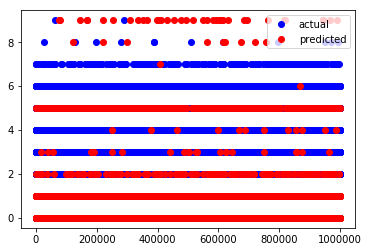

In [0]:
plt.plot(y_test, 'bo', label='actual')
plt.plot(y_pred_svm_3, 'ro', label='predicted')
plt.legend()
plt.show()

**CV =10**

In [0]:
param_grid_SVM = {#'penalty':['l1', 'l2'],
  					'C':[0.1, 1, 10], 
  					'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1],
            'decision_function_shape': ['ovr']
             }

svm_grid_search10 = RandomizedSearchCV(estimator = svm, param_distributions = param_grid_SVM, 
                                      cv = 10, n_jobs = -1, verbose = 2)


In [0]:
svm_10 = svm_grid_search3.fit(X_train, y_train)
print("Best CV10 params", svm_10.best_params_)
print("Best CV10 accuracy", svm_10.best_score_)
y_pred_svm_10 = svm_10.predict(X_test)
accuracy_svm_10 = accuracy_score(y_test, y_pred_svm_10)
print('Accuracy of SVM_10 Classifier: {:.3f}'.format(accuracy_svm_10))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  100 out of  100 | elapsed: 120.2min finished




Best CV10 params {'C': 1, 'decision_function_shape': 'ovr', 'gamma': 0.1}




Best CV10 accuracy 0.5537194322271092

'Accuracy of SVM_10 Classifier: 0.557

In [0]:
z = confusion_matrix(y_test.values, y_pred_svm_3)
z

array([[366961, 134214,      4,      0,      2,     26,      0,      0,
             0,      2],
       [229660, 192719,     65,      6,      5,     16,      0,      1,
             5,     21],
       [ 19705,  27869,     35,      9,      2,      0,      1,      0,
             0,      1],
       [  5749,  15341,     25,      4,      2,      0,      0,      0,
             0,      0],
       [    82,   3798,      1,      0,      1,      0,      0,      0,
             0,      3],
       [  1324,    225,      0,      0,      0,    435,      0,      0,
             4,      8],
       [   299,   1114,      9,      2,      0,      0,      0,      0,
             0,      0],
       [    16,    209,      3,      2,      0,      0,      0,      0,
             0,      0],
       [     1,      6,      0,      0,      0,      5,      0,      0,
             0,      0],
       [     0,      2,      0,      0,      0,      0,      0,      0,
             0,      1]])

In [0]:
np.unique(y_pred_svm_10)

array([0, 1])

In [0]:
np.unique(X_test)

array([-1.60595895e+00, -1.59884640e+00, -1.59659058e+00, -1.59367332e+00,
       -1.58589488e+00, -1.35137437e+00, -1.34467258e+00, -1.34044815e+00,
       -1.33892906e+00, -1.33843532e+00, -1.33517076e+00, -1.33216051e+00,
       -1.33112018e+00, -1.32640111e+00, -1.31901987e+00, -1.07189917e+00,
       -1.06564978e+00, -1.06547463e+00, -1.05912891e+00, -1.05214486e+00,
       -8.04869288e-01, -8.00179378e-01, -7.98788741e-01, -7.91856699e-01,
       -7.85269848e-01, -5.37839403e-01, -5.34708976e-01, -5.32102855e-01,
       -5.24584492e-01, -5.18394838e-01, -4.55686847e-01, -4.54300040e-01,
       -4.44548669e-01, -4.44379718e-01, -4.43702431e-01, -2.70809517e-01,
       -2.69238574e-01, -2.65416969e-01, -2.57312284e-01, -2.51519827e-01,
       -3.77963133e-03, -3.76817244e-03,  1.26891725e-03,  9.95992394e-03,
        1.53551835e-02,  2.61702230e-01,  2.63250254e-01,  2.67954803e-01,
        2.77232132e-01,  2.82230194e-01,  4.36072502e-01,  4.40000676e-01,
        4.47765902e-01,  

In [0]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

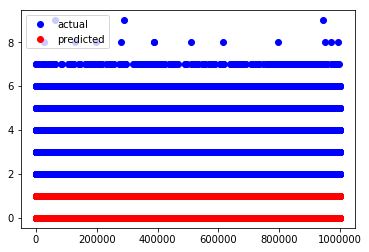

In [0]:
plt.plot(y_test, 'bo', label='actual')
plt.plot(y_pred_svm_10, 'ro', label='predicted')
plt.legend()
plt.show()

###Random Forest

Here we loop over different values of n_estimators and plot a graph of training vs test accuracy for each one. 

We can see that the highest accuracy occurs at n_estimators=25 so that’s the one we choose for our cross validation.

We then run a 3-fold cross validation, getting an average accuracy score of 0.576.

We also ran a 10-fold cross validation getting an average score of 0.580, not that much better, but slightly better than 3-fold.


In [0]:
#setup arrays to store train and test accuracies
estimators = [5,10,15,20,25]
train_accuracy = np.empty(len(estimators))
test_accuracy = np.empty(len(estimators))

#loop over different values of k
for i, k in enumerate(estimators):
    #setup a Random forest Classifier with k estimators: rf
    rf = RandomForestClassifier(n_estimators=k)

    #fit the classifier to the training data
    rf.fit(X_train, y_train)
    
    #compute accuracy on the training set
    train_accuracy[i] = rf.score(X_train, y_train)

    #compute accuracy on the testing set
    test_accuracy[i] = rf.score(X_test, y_test)
    
    #generate plot


plt.title('Random Forest: Varying Number of estimators')
plt.plot(estimators, test_accuracy, label = 'Testing Accuracy')
plt.plot(estimators, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

![alt text](https://raw.githubusercontent.com/samirakazemi/SCS_3253_010_Machine_Learning_Final_Project/master/plots/RF.PNG)

**CV=3**

In [0]:
#cross validation of rf scores

rf=RandomForestClassifier(n_estimators=25)

#computing 3-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(rf, X_train, y_train, cv=3)

#print the 3-fold cross-validation scores
print(cv_scores)

print("Average 3-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 3-Fold CV Score: 0.576

**CV=10**

In [0]:
#cross-validation with 10-folds

rf=RandomForestClassifier(n_estimators=25)

#computing 10-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(rf, X_train, y_train, cv=10)

#print the 10-fold cross-validation scores
print(cv_scores)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 10-Fold CV Score:0.580

###Decision Tree


Here we import and set up a parameter grid for a Decision Tree Classifier.

For hyper parameter tuning:
We run a randomized search CV with cv=3 and 50 iterations to see what the best parameters for our decision tree are.
We also run a randomized search CV with cv=10 as well.

Looking at the accuracy scores we see that using cv10 vs cv3 has only increased our accuracy score by ~0.0016 which is quite an insignificant change so it’s probably better to use CV3 as it takes less time to run.


In [0]:
dt = DecisionTreeClassifier()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dt.get_params())
parameters={'min_samples_split' : range(10,500,20),
            'max_depth': range(1,20,2)}

**CV=3**

In [0]:
# Use the random grid to search for best hyperparameters usin 3 fold cross validation
dt_random3 = RandomizedSearchCV(estimator = dt, param_distributions = parameters, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dt_random3.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.2s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'min_samples_split': range(10, 500, 20), 'max_depth': range(1, 20, 2)},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [0]:
#printing best 3 fold cross validation score and parameters
print("Best CV 3 params", dt_random3.best_params_)
print("Best CV 3 accuracy", dt_random3.best_score_)

Best CV 3 params {'min_samples_split': 110, 'max_depth': 15}
Best CV 3 accuracy 0.5413834466213514


In [0]:
#extract best estimator from 3-fold Randomized Search CV
dt_best3 = dt_random3.best_estimator_

In [0]:
#use the random grid to search for best hyperparameters
dt_random10 = RandomizedSearchCV(estimator = dt, param_distributions = parameters, n_iter = 50, cv = 10, verbose=2, random_state=42, n_jobs = -1)
#uit the random search model
dt_random10.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   22.3s finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'min_samples_split': range(10, 500, 20), 'max_depth': range(1, 20, 2)},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

**CV=10**

In [0]:
#printing best 10 fold cross validation score and parameters
print("Best CV 10 params", dt_random10.best_params_)
print("Best CV 10 accuracy", dt_random10.best_score_)

Best CV 10 params {'min_samples_split': 190, 'max_depth': 13}
Best CV 10 accuracy 0.5429028388644542


In [0]:
#extract best estimator from 10-fold Randomized Search CV
dt_best10 = dt_random10.best_estimator_

###Bagging Classifier

We then fit a bagging classifier using the best decision tree model form cv3, predicted on the test set and computed the accuracy getting an accuracy of 0.609

We also fit a bagging classifier using the best decision tree from cv10, predicted on the rest set and computed the accuracy getting an accuracy of 0.599.

Again, this is consistent with our earlier decision to go with 3fold cross validated decision tree as the base estimator.


In [0]:
#setup arrays to store train and test accuracies
estimators = [10, 20, 50, 100, 200, 500]
train_accuracy = np.empty(len(estimators))
test_accuracy = np.empty(len(estimators))

#loop over different values of k
for i, k in enumerate(estimators):
    #setup a Random forest Classifier with k estimators: clf
    bcf = BaggingClassifier(n_estimators=k)

    #fit the classifier to the training data
    bcf.fit(X_train, y_train)
    
    #compute accuracy on the training set
    train_accuracy[i] = bcf.score(X_train, y_train)

    #compute accuracy on the testing set
    test_accuracy[i] = bcf.score(X_test, y_test)
    
    #generate plot
plt.title('Baggingt: Varying Number of estimators')
plt.plot(estimators, test_accuracy, label = 'Testing Accuracy')
plt.plot(estimators, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

![alt text](https://github.com/samirakazemi/SCS_3253_010_Machine_Learning_Final_Project/blob/master/plots/baggging.PNG?raw=true)

**CV=3**

In [0]:
bc3 = BaggingClassifier(base_estimator=dt_best3, n_estimators=500, n_jobs=-1)

In [0]:
#fit Bagging Classifier using 3-fold cross validated Decision Tree as the base estimator
bc3.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=110,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred3=bc3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print('Accuracy of Bagging Classifier using 3 fold cross validated Decision Tree: {:.3f}'.format(accuracy3))

**CV=10**

In [0]:
bc10 = BaggingClassifier(base_estimator=dt_best10, n_estimators=500, n_jobs=-1)
#fit Bagging Classifier using 10-fold cross validated Decision Tree as the base estimator
bc10.fit(X_train, y_train)

In [0]:
y_pred10=bc10.predict(X_test)
accuracy10 = accuracy_score(y_test, y_pred10)
print('Accuracy of Bagging Classifier using 10 fold cross validated Decision Tree: {:.3f}'.format(accuracy10))

###AdaBoost Classifier

Here we run a for loop to iter through a list of n_estimators and compute the accuracy of the adaboost classifier accordingly.

We choose n_estimators=20 as there doesn’t seem to be a difference in accuracy as we increase the number of estimators.

We then fit the ABD classifier using our 3 fold cross validated decision tree and compute the accuracy which turns out to be 0.513.

We also fit it using our 10 fold cross validated decision tree and compute the accuracy to find out it’s 0.491, so again, we are better off using our 3 fold cross validated decision tree as our base estimator.


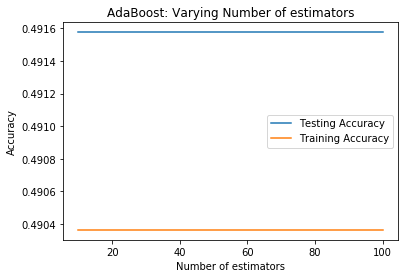

In [0]:
#setup arrays to store train and test accuracies
estimators = [10, 20, 50, 70, 100]
train_accuracy = np.empty(len(estimators))
test_accuracy = np.empty(len(estimators))

#loop over different values of k
for i, k in enumerate(estimators):
    #setup a Random forest Classifier with k estimators: clf
    adb_clf = AdaBoostClassifier(n_estimators=k)

    #fit the classifier to the training data
    adb_clf.fit(X_train, y_train)
    
    #compute accuracy on the training set
    train_accuracy[i] = adb_clf.score(X_train, y_train)

    #compute accuracy on the testing set
    test_accuracy[i] = adb_clf.score(X_test, y_test)
    
    #generate plot
plt.title('AdaBoost: Varying Number of estimators')
plt.plot(estimators, test_accuracy, label = 'Testing Accuracy')
plt.plot(estimators, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

**CV=3**

In [0]:
adb3 = AdaBoostClassifier(base_estimator=dt_best3, n_estimators=20)
adb3.fit(X_train, y_train)

In [0]:
y_pred_adb3=adb3.predict(X_test)
accuracyadb3 = accuracy_score(y_test, y_pred_adb3)
print('Accuracy of 3 fold CV AdaBoost Classifier: {:.3f}'.format(accuracyadb3))

Accuracy of 3 fold CV AdaBoost Classifier: 0.513

**CV=10**

In [0]:
adb10 = AdaBoostClassifier(base_estimator=dt_best10, n_estimators=20)
adb10.fit(X_train, y_train)

In [0]:
y_pred_adb10=adb10.predict(X_test)
accuracyadb10 = accuracy_score(y_test, y_pred_adb10)
print('Accuracy of 10 fold CV AdaBoost Classifier: {:.3f}'.format(accuracyadb10))

Accuracy of 10 fold CV AdaBoost Classifier:  0.491

###Gradient Boosting Classifier

Here we print the parameters used by our current model. We then set a parameter grid with values for hyper parameter tuning.

We then run a RandomizedSearchCV using our parameter with 3-fold CV and fit it to our training data to get the best hyperparameters for our model.

We then print the best parameters and extract the best model and use it to predict on X_test.

We bring the accuracy getting a training accuracy of … and a test accuracy of …

We did not run 10-fold CV randomized search as it took way too long to run for this dataset.


In [0]:
clf = GradientBoostingClassifier(random_state = 13)
from pprint import pprint
#Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

In [0]:
#number of trees in random forest
n_estimators = [10, 20, 50]
#number of features to consider at every split
max_features = ['auto', 'sqrt']
#maximum number of levels in tree
max_depth = [10, 20, 50]
max_depth.append(None)
#minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#create the random grid
random_grid1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid1)

{'max_depth': [10, 20, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 50]}


In [0]:
#use the random grid to search for best hyperparameters
#first create the base model to tune
clf = GradientBoostingClassifier()
#random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid1, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#fit the random search model
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 173.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [0]:
clf_random.best_params_

NameError: ignored

In [0]:
best_clf = clf_random.best_estimator_

y_pred13=best_clf.predict(X_test)
print('Testing Accuracy with 3 fold CV = {:0.2f}%.'.format((best_clf.score(X_test, y_test)*100)))
print('Training Accuracy with 3 fold CV = {:0.2f}%.'.format((best_clf.score(X_train, y_train)*100)))

NameError: ignored

### MLP

We decided to try and use Multilayered Perceptrons on the dataset as well. We went this model as it is an artificial neural network that tends to perform well on classification problems, and with tabular data. It also performs well as a base neural network model. We found that with this model, both cv3 and cv10 perform exceptionally well (~99%), but when looking at the distribution of the predictions, we noticed that cv3 seems to be doing better on cards with higher strengths.

CV = 3

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

params_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp = MLPClassifier()

mlp_cv3 = RandomizedSearchCV(estimator = mlp, param_distributions = params_grid, cv = 3, n_jobs = -1, verbose = 2, random_state =seed)

mlp_cv3.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 32.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [0]:
mlp_cv3.get_params_

{'activation': 'tanh',



 'alpha': 0.05,


 'hidden_layer_sizes': (50, 100, 50),



 'learning_rate': 'adaptive',



 'solver': 'adam'}

In [0]:
mlp_cv3.get_score_

0.9534586165533786

In [0]:
y_pred_mlp3 = clf.predict(X_test)

In [0]:
acc_mlp3 = accuracy_score(y_test, y_pred_mlp3)
print(acc_mlp3)

0.993452

In [0]:
plt.plot(y_test, 'bo', label='actual')
plt.plot(y_pred_mlp3, 'ro', label='predicted')
plt.legend()
plt.show()

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXEAAAD8CAYAAACB3pQWAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3Xt4G+WdL/DvT7IVYzuFRDaEJEQK%0Az+k2IeRCyLOQQ+khOLDcsuyWpIQ44bIH0jrnQMuWbYG0T8vTYx447fZwv6QFCrWglAALywOBwnJd%0ACI29uQCxSUN9wQkQ27QhV3zR7/wxI2kka6SRLMka+ft5nnlijd553987887P8sxEr6gqiIjInTyj%0AHQAREWWPSZyIyMWYxImIXIxJnIjIxZjEiYhcjEmciMjFmMSJiFyMSZyIyMWYxImIXKwsH5XW1NRo%0AMBjMR9VERCWppaWlV1VrM90uL0k8GAyiubk5H1UTEZUkEenMZjteTiEicjEmcSIiF2MSJyJysbxc%0AE6exZ2BgAN3d3Th8+PBoh+J6FRUVmDp1KsrLy0c7FHIBJnHKie7ubowfPx7BYBAiMtrhuJaqoq+v%0AD93d3Zg+ffpoh0MuUDxJPBQCvv1t4MCB7LYXAc48E9i5E9rZhf2oRCUOwYMw1OOFZ9EZwM6dQFcX%0AUFkZ3051NbBqFfDAA0B/f3bte73AGWcAGzdm3wdrX6qqjHqmTQPOOw/4/e+Bvr5YmaoqoKIC+Pxz%0Aoz+HDgHhcHw9Hg+waJG5TzoRhsADYxIQRZbX0rxeYPVq4J57YuvWrMHhCy5A8OijIR0dzuopKzPi%0ATYw5oqICsH6qr601jtOuXdkfo2QxHHcc4Pcb+zZSt88HHHkksHdv/Ou//AUYHExez4QJsfIej32/%0Akm1r2Q8CwA+gZ88e4Pjjh5f3eoGhIWOMOJ3QpaICuOKK+DGUyfapRMZhX9/wOq1jdNo0oLHRWL92%0ALdDZGV/e5zP2rdP9lozPl9XYSLYXHH8M8fuBb30rft/6/cDttwP19RnHkg3Jx8w+CxYs0IweMQyF%0AgEsvHdkBTEORwYGh9BoajES+Zg1w771ofeEFzKypyW+buUo8iXXW1BgnYB7HX6Zae3sx89xzRzuM%0A3CovN/Z3rn4JFzOfD3jwwYwSuYi0qOqCTJsqjhuba9fm/QRiAs+xdevi/y2EfEwlqAr09BRVAi9Z%0AAwNjI4EDRj/Xri1IU8WRxLu6RjsCytTQUPy/LvNaSwve3rp1RHVUf+MbOYqGSlKB8lpxJPFp00Y7%0AAsqU1xv/b4ZCL0xEcMlseP72ZASXzEbohYk5DC6911pa8Pa2bQVtk8aYAuW14kjijY3GzaA8ysMf%0A4mPb6tXx/2Yg9MJErL45gM5Px0FV0PnpOKy+OZA+kTt46uUfrrsOJ69ahVnf+hbWPfUUAGDD229j%0A/sqVmLtiBeoaGtCxezfue/JJ/L/HHsO8+nq82d6Oy2+6CetfeSVaT+RT9v6DB1HX0ID5K1di9vLl%0AeOb11zPuL5nKy41rxWOBzxe7kZtnxZHE6+uBRx4x7mZnSwSoqwMCASgE+1CFIfNZjLDHCzHfiz75%0AYVVdbdyoG8kA83qN9kfShwgRIyYRI+aGBuOOt1VVlbEu0p9kvwQ9Hss+AYYgUBi/0LK+Auz1xm5q%0AAsa/DQ0ZVbH2nik4eDj+E/zBw16svWdKbEVFRfxGtbVAMJj2GD344x+j5be/RfMjj+COxx/HZ319%0AuKqxEU/eeiu2PvoonrjlFgQnT8Z3LroI165ciS1vv43Tly0z9neZ+bCWz2fsV58PFT4fnr79dvzX%0Aiy/i1V/9Ct+/7TYMexigrMyILxJbJh9IysoyKx/5yyeTxzgrKoaPoVw9BhoZh8nqtI7RQAB46CHj%0AZl8gMLy8zzfyD3JZnr+aZHHM7x++b/3+jG9qjkTxPGJYX5+zTguA8QmvHbE+NldsRhibAPAmvM6Z%0Ae+4BWluBmTMdFe/6zG79OGBBmpvzib/MEtzx05/i6aefBgB83NuLdX/8I76xeDGmX3ghACD6Wf+5%0A54zEHalv3DgjuUTaFwHmzIEODODGa6/FG2+8AY/Hg129vfjsuOMwadIkI+mkizdbra25v5FbLOO7%0AQMnNqZycC6O4b4vjkziNKXaXCkd6CfG1117Dyy+/jHfeeQdbt27FSSedhHnz5jnatqysDGHzCZVw%0AOIx+8ymKUCiEnp4etLS0YMuWLTjmmGP4v1KpqDCJU8E1Nhr/P8mqsnLklxD37t2LCRMmoLKyEm1t%0Abdi4cSMOHz6MN954A+3t7QCAzz//HAAwfvx47Nu3L7ptMBhES0sLAODZZ5/FwMBAtM6jjz4a5eXl%0AePXVV9HZmdW3hRLlDZM4FVx9vfF4eeQWRSBgvB7pX9nnnHMOBgcHMXPmTFx//fU49dRTUVtbi3Xr%0A1uGb3/wm5s6di4svvhgAsGTJEjz99NOYN28e3nzzTVx11VV4/fXXMXfuXLzzzjuoMu9t1NfXo7m5%0AGbNnz8YjjzyCGTNmjLT7RDlVHP9jk1yvtbUVMx1eE6f0uD/HHnf/j00iIsoKkzgRkYsxiRMRuRiT%0AOBGRizGJExG5GJM4EZGLMYkT2aiurgYA7N69G0uXLk1Z9rbbbsPBgwczqv+1117DBRdckHV8RACT%0AOI2WUMj4QiuPx/g3FCpIs0NZfP/55MmTsX79+pRlskniRLnAJE6FFwoZX2Hb2Wl8yVNnp/F6hIm8%0Ao6MDM2bMQH19PWbOnImlS5fi4MGDCAaD+OEPf4j58+fjiSeewEcffYRzzjkHJ598Mk4//XS0tbUB%0AANrb27Fw4ULMnj0bP/rRj+LqPfHEEwEYvwSuu+46nHjiiZgzZw7uvPNO3HHHHdi9ezcWLVqERYsW%0AAQBeeuklLFy4EPPnz8eyZcuwf/9+AMCGDRswY8YMzJ8/H0+ZX5VLNCKqmvPl5JNPVhpbtm/f7rxw%0AIKBqpO/4JRAYUQzt7e0KQN966y1VVb3iiiv05z//uQYCAb311luj5c4880zdsWOHqqpu3LhRFy1a%0ApKqqS5Ys0YcfflhVVe+66y6tqqqK1jtr1ixVVb3nnnv0oosu0oGBAVVV7evrM7sU0J6eHlVV7enp%0A0dNPP13379+vqqq33HKL3nTTTXro0CGdOnWq7tixQ8PhsC5btkzPP//8pH3JaH9SSQDQrFnkW0ef%0AxEXkWhH5QETeF5HHRKQi/VZZCIWMrwQViS2LF0ffyuiv71DImAA3Uk9NTeaf9Mw6VCS6fO6twVtr%0AktSTGOCaNca/IsZ3RovEBW4tfk1NCPtrEjpnLVBTYyzW99esMV5H+hf52VJ2f00QD1evQYcEERbj%0AdbRu676pro69jsRaUxP7TvNs919fH4ZatkCbm6PLUMsW+2mrurqMCYu3bQOam+OXLVtis4lb6o8r%0Au20bjjvmGJxWVQX09WHlkiV46/nngf5+XDxnDtDXh/379+Ptt9/GkiXLcMLfzMbqVZfhk/Z2YNs2%0A/Odbb+GSs88Gtm3DqlmzjHk3zXpx6BDQ3IyXn3gC3z7rLJTt3QsAmDhxohFHf78RY3MzNj76KLZ/%0A8AFOO+00zJs3Dw8//DA6OzvR1taG6dOnY+LEr+K99wSnnLISX3wxvFtpZXIyJCtrd/ytY81m3KbT%0AtngNhsQTd84MayOxvnRjPVLGGrPXGx+bXT8j56D1XEk2pkPGORgWiYsfNcb5bre7R+mqYLx0WR7A%0AFADtAI4wX/8ewOWptsnqk3hTU/JPZ4B2n1CnlZXxqysrjU1s6yovH16Xz5diI4d1AHoYPn2zoSm+%0AbGKAdktlpb7Z0BQtfgmadD8Sti0vN2K1q8PjcdYWoOGE14PeclWv1/H2TvffsE+Ovb06tKlZddOm%0AYUt40qTk9U+apNqcfBvdtMl4r7c3Wr+2tMS93/7MMzpt0qTo61fuvVf/4YwzNHDssdrzhz+otrRo%0A93vt6vdP0o829ergpvjtJx55pA5s3Ki6aZPuffVVrTriiGi9s44/XnXTJv3mokX60l13GW339hpL%0Ac3OsjU2b9Nl//VddfvbZsVhNmzdv1lNPPT0a9i9+8Yx+/evnR6tKuT9TjTW7kyFZ2fIsj3/KE87Q%0AWtcwbLylrS/duVNZqdrQYHsu2p4v6c4h65huaNABn30Mh+HTS9DkKHQHu8kW8vlJHMbkEUeISBmA%0ASgC7c/7bJMXM0JO3v4LEe0YHD6bYZO1aY2btRJnMQG1XB4Bx6Edw3dr4sk5vah08iOC6tdHiN2Mt%0AqpCwbbpZwTOYmT3xC++9QwPZT26cyf7btcucVylJTGvWDJ+5p6LC+OtCk28DwHhv165o/cn2Q9en%0An+Idc+7MRzdswNfnzo29GQ6j9vAXmDx5Oja+/BC8CENVsXXHDgDAaXPm4HcvvggACG3YkDSEs045%0ABfc/9RQG+/uBXbvw+fbtgCrGV1Zi34EDAIBTZ8/Gf27dip3vvAMAOHDgAHbs2IEZM2ago6MDXV0f%0AAQBeeumxSFjRbqWVbKzZnQzJyg5kefxTnnCG//bKOucTLETqS3fuHDxofMWlzbkIIPn5ku4ciujv%0AB9atQ1m/fQzj0I+bEet7qtAd7KacS5vEVXUXgF8A6ALwCYC9qvpSYjkRWS0izSLS3NPTk3kkWcwM%0AbbtJqrqctpOm3OQhy/sZxm7ddhoKMyN2zjjta6oT6NxzgRtvBCZNMv6snTTJeH3uuc7rtan/a4EA%0A7n7iCcxctgx/+eILNCQ8GliOfvzsZyE88syTmLtiBWZdfHF03szbv/993L1+PWYvX45dNmP4ygsv%0AxLRJkzBnxQrMXboUj/77vwMAVv/jP+Kca67Bou98B7UTJuA3P/kJLvnBDzBnzhwsXLgQbW1tqKio%0AwA03rMP3vnc+Vq6cjwkTjna0u+KkuhTltGy20tTnRYa/HLq6nMWY7YcOpxzUn3iepgq9QJPcR6X9%0AKloRmQDgSQAXA/grgCcArFfVJrttsvoq2mDQeEohCQWSfqoLBICOjszqst8ogzoAdHsDmDrY4ahs%0Asm2PGzK2bUcQQbhoogGb/Tfsq1O3bcsgM2XA5wPmzElaf8fu3bjg2mvx/uOP227eDx+2YQ5mYxvG%0AYYTxReZ0tOtnJFYLu92SWNT2q2jtxlqy45LhuEwrzbkzKGUoyySRR+baTBej15vfRO6g/g4EMB0d%0A0depQneaYhLl86toFwNoV9UeVR0A8BSA/55pQ2mlmNZl9wl1mc0E09hozKydKJMZqO3qAPAlfOhY%0A3RhfNjFAO5WV6FjdGC1+IxpxAAnbppsVPIMJZRN/9Q15y2OT7WYqk/03ZQrCNn9chyHGxMKJ/Yjc%0AcLIjAkyZEq0/7X5IrMvjwZe1U+DxALswBUOJwz9d+wl1YcoUY0m2jTVWi2RhR6pyJJNpkZKVLc/y%0A+DuYemln3WrnkwxH6kt37lRWGo+f2pyLAJKfL+nOoQifD1i9GoM++xi+hA83Itb3VKHnYoaqjKW7%0AaA7gFAAfwLgWLgAeBnB1qm2yfsSwqWn4zYi6uuhbgYCqiPFv2psHTU2qfn+sHr8/8zsOZh1h8wZh%0AGNA+jz/+pqa1rDXAhobYo3SRG0mWwK3Fr/Y36T5/QuesBfx+Y7G+39BgvI70L/Kzpew+f0B/U9Wg%0A7QjoEIzX0bqt+6aqKvY6Eqvfb6x3uP+S3ojr7dXB5s0a3rQpugw2b46/Obl1q3GXb+vW2I3CyDrr%0Asnnz8Lt/6comq9+y2UebevXLTVs17KR962KpK1rh5s2pY7UJO7GqlPszIpOTIVlZu+NvHWs24zad%0A1roGHYTEnTPD2kisL91Yj5Sxxhy5uZ/sfElcZz0/rIt1TDcZ5+AQEBe/+o3z3W53Z5yXUkCWNzYd%0AzewjIjfBuJwyCGAzgCtV9Uu78pzZZ+xpbW3FjBkzIE4/yZItVUVbWxtn9hljsr2cUuakkKr+BMBP%0AMo6KxoyKigr09fXB7/czkY+AqqKvrw8ViU/vENlwlMSJ0pk6dSq6u7uR1ZNJFKeiogJTp04d7TDI%0AJZjEKSfKy8sxffr00Q6DaMzhF2AREbkYkzgRkYsxiRMRuRiTOBGRizGJExG5GJM4EZGLMYkTEbkY%0AkzgRkYsxiRMRuRiTOBGRizGJExG5WNEk8ZtnhaKzsndIECskBBHgsrIQPvYas1BHZqAelDLcX7YG%0A1dXACgmhR2Iz0lvLqQiGxIvtUxYDwSBUPPjYG6s7YbJrXFMTi6FHatAjNXHxjB8fm2hexGg7Ur5v%0AfBBti9eg1xKLiqBHanCXrBnWtyOOMCYDiEwob63L2nbf+CCuqQlFJwK3TkBvN3l3KASsro7UZ+yv%0AsBmLtU+XlYfw1prYdN2Hq2vwubfGZhvrPvXgCxk/7FhF+tGTZB9YyyT211qH12u8110WHHY8wyI4%0AKBXD6rXWtb8mGD2oDy4OoTOhjWDQWN9dZqzvNNffJWswKGVxcXdKEDfPCqGmZni/eqUG/zIlNOwY%0AJPZrdXUoOmZWemLvdUrycfjWmsh4j8Wc2Hayflv34fjxwyd9t46bFRKKG6eJY/SzI4aPucS2YuXj%0AZ4e3Hutx42KT0ieO7y+kOm6bF2VxdP8PShlelMVx7a30hKJjI3kcycdishituSHSfmI8kXo8HiM3%0AGeMldl4ktm09t6xjsCCy+RLydEumk0I0njB8xvf9qNQ70TB8JnhzCQO6AXV6CClmwbaUTaw7Mnu1%0AOdm1Xl6eZNZ5m22A5LPU2830nap9u7pSlU+1eL2q9ZK6vshyCOV6GA5mBE+zROK7BE22x8M6Y3iy%0A/lrrcBJ7ZOmHd1gfBnyV+uoJw8eO3Zj6Eh7bYxfZJlm/EmdBt+vXCpt+JY7DB+qGlzmEcu3H8Nnp%0Ak/U72TgpL4+fD8HuGKUao5mMdaf7JV37yeJJduzs4s50HNn1IVU9qfbBgC/zae+R5aQQGW+QjyTe%0AjkDyHZFk8DrdiemWdgSiL71e+xjstnFSPpd1WcunW0YaW7b9SddupA925ZzU4XSxGzvpxlSm2zg5%0Ajqn6Zd2+Iwd9TzdOMtm/6Y6X0zjyfUzzNY5GXE8gkFEezDaJO5rZJ1OZzuwTFk/SiZAVsJml0dn7%0AKduEwItw9PUQksdgt42T8rmsKzHeVEYaWzYi82mmajfSB7v4nNThlN3YyGbMpNrGyXFM1a9cjqnE%0A+pLJpI10x8tpHLkaj06PXa7G0YjrEQHCzs5Zo3j+JkrOuy5MS7p+CFlO6Jthm16vfQx22zgpn8u6%0AMmlvpLFlowvT0rYbed+unJM6nLIbO9mMqVTbODmOqfplXf9xDvru9BhkUlc2xySX50qE02OXq3E0%0A4nqmFeg8zObje7qF18Sdt29XV6ryqRZeE+c1cWtRXhPPbkzzmngWs903ntAUnZW9HYHoILjU26Rd%0AHmMW6sgM1APw6n3eBq2qMgbIHsRmpLeWCwM6CI9+MLlONRDQMES7PLG6Eya71qv9sRj2wK974I+L%0Ap7o6NtF8ZHBGyvdWB7S1rkF7LLGEAd0Dv96JhmF9q6gwTq7IhPLWuqxt91YH9Gp/U3QicOsE9IlL%0ApD9NTapXVUXqM/bXkBmLtU+XljXpmw2x6boPVfm1z+O32ca6T0X3onrYsYr0Y0+SfZCYXKz9tdbh%0A8RjvfewNDDueQ4AewLhh9Vrr2ucPRA/qA3VN2pHQRiBgrP/Ya6zvMNffiQYdgDcu7g4EtPGEJvX7%0Ah/erB369bvLwX6yJ/bqqqik6Zuol9l4Hko/DNxsi4z0Wc2Lbyfpt3YfV1cMnfbeOm0vQFDdOE8fo%0ApxXDx1xiW7Hy8bPDW4+1zxeblD5xfO9FVdw2G1AX3f8D8OoG1MW1Vy9N0bGRPI7kYzFZjNbcEBnj%0AifFE6hExcpMxXmLnRWLb1nPLOgYzkW0SL4pr4kREY52rr4kTEVF2mMSJiFyMSZyIyMWYxImIXIxJ%0AnIjIxZjEiYhcjEmciMjFmMSJiFyMSZyIyMWYxImIXIxJnIjIxZjEiYhcjEmciMjFHCVxETlKRNaL%0ASJuItIrIwnwHRkRE6ZU5LHc7gA2qulREfAAqcx3Ia77F+B8Dr+S6WiKigvsS5ajQ/oK0lTaJi8iR%0AAL4B4HIAUNV+ADmNLpLAs50vk4iomIzDAA6LryCJ3MnllOkAegA8JCKbReTXIlKVyyCYwImolAiM%0ARF4ITpJ4GYD5AO5V1ZMAHABwfWIhEVktIs0i0tzT05PjMImIKBknSbwbQLeqvmu+Xg8jqcdR1XWq%0AukBVF9TW1uYyRiIispE2iavqpwA+FpGvmavqAGzPZRCvl9ch9zN9EhGNDoVxc7MQnD6dcjWAkPlk%0Ayp8BXJHLIM7of5lPpxBRySiqp1MAQFW3AMh4FuZMnNH/cj6rJyIqmIoCtsX/sUlE5GJM4kRELsYk%0ATkTkYkziREQuxiRORORiTOJERC7GJE5E5GJM4kRELsYkTkTkYkziREQuxiRORORiTOJERC7GJE5E%0A5GJM4kRELub0+8Tz7srKEO4+dBl8GBrtUEbFPlShDAM4IodzUA+gDAods/uU3CUyMYzb59vthR8/%0APep23P2X+oK0VxRJ/MrKEO4/tBLe0Q5kFH0FB3Jepw+DOa+TKF/cnrwjatGHX/71n/C/JqAgibwo%0ALqf86NDaMZ3Aiai0jEM//uWvawvSVlEk8WnoGu0QiIhyqlB5rSiSeBemjXYIREQ5Vai8VhRJ/P8c%0A0chbb0RUMr6EDz8/qrEgbRXFjc1fH6zHlZXg0yl8OoXGMD6dkh1R1fSlMrRgwQJtbm7Oeb1ERKVK%0ARFpUdUGm2xXF5RQiIsoOkzgRkYsxiRMRuRiTOBGRizGJExG5GJM4EZGLMYkTEbkYkzgRkYsxiRMR%0AuRiTOBGRizGJExG5GJM4EZGLMYkTEbmY4yQuIl4R2Swiz+UzICIici6T7xP/LoBWAF/JRyCrvCH8%0AMvxd1KAvH9UTERXEPlSjAfchpEU0272ITAVwPoBGAP+c6yBWeUP4VfgKVGAg11UTERXUV7Afv8Hl%0AqBcUJJE7vZxyG4AfAAjnI4ifhdcygRNRySjHIBpRJLPdi8gFAPaoakuacqtFpFlEmnt6ejIKgrPd%0AE1GpKabZ7k8D8Pci0gHgdwDOFJGmxEKquk5VF6jqgtra2oyC4Gz3RFRqima2e1W9QVWnqmoQwHIA%0A/6GqK3MZxI89jTiM8lxWSUQ0agZQhrUYQ7Pd/3aoHqu84NMpROR6hX46hbPdExEVAc52T0Q0BjGJ%0AExG5GJM4EZGLMYkTEbkYkzgRkYsxiRMRuRiTOBGRizGJExG5GJM4EZGLMYkTEbkYkzgRkYsxiRMR%0AuRiTOBGRizGJExG5WFF8nzgAhEUgox0EEVEOKABPHr7mO5miSOKRBM4kTkSlIixSkEReFEmcCZyI%0ASkkh8xmviRMRuRiTOBGRixVFEldzISIqBYXMaUVxTdyjirDwqjgRlYYx93QKULgOExHlG29sEhGR%0AI0ziREQuxiRORORiTOJERC7GJE5E5GJM4kRELsYkTkTkYkziREQuxiRORORiTOJERC7GJE5E5GJM%0A4kRELsYkTkTkYmmTuIgcJyKvish2EflARL5biMCIiCg9J19FOwjg+6r6XyIyHkCLiPxBVbfnMhDO%0Adk9EpaKovk9cVT8B8In58z4RaQUwBUDOkjhnuyeiUlOUs92LSBDASQDezWUQTOBEVEqKclIIEakG%0A8CSA76nqF0neXy0izSLS3NPTk8sYiYjIhqMkLiLlMBJ4SFWfSlZGVdep6gJVXVBbW5vLGImIyIaT%0Ap1MEwAMAWlX1l/kIgrPdE1EpKbbZ7k8DsArAeyKyxVx3o6o+n6sgONs9EZWSYns65S0U4Do9Z7sn%0AolJRlDc2iYio+DCJExG5GJM4EZGLMYkTEbkYkzgRkYsxiRMRuRiTOBGRizGJExG5GJM4EZGLMYkT%0AEbkYkzgRkYsxiRMRuRiTOBGRizGJExG5WEZzbOYTZ7snolJRVN8nXgic7Z6ISk1RznafL0zgRFRK%0AOCkEERE5wiRORORiRZHEOds9EZWSYpvtPu842z0RlZIx93QKwNnuiah08MYmERE5wiRORORiTOJE%0ARC7GJE5E5GJM4kRELsYkTkTkYkziREQuxiRORORiTOJERC7GJE5E5GJM4kRELsYkTkTkYkziREQu%0A5iiJi8g5IvKhiOwUkevzHRQRETmT9qtoRcQL4G4AZwHoBrBJRJ5V1e25DISz3RNRqSi27xP/WwA7%0AVfXPACAivwNwIYCcJXHOdk9EpaZQs907uZwyBcDHltfd5rqcYQInolJSyJyWsxubIrJaRJpFpLmn%0ApydX1RIRUQpOkvguAMdZXk8118VR1XWqukBVF9TW1uYqPiIiSsFJEt8E4KsiMl1EfACWA3g2l0Fw%0AtnsiKiVFNdu9qg6KyP8G8CIAL4AHVfWDXAbB2e6JqJQU29MpUNXnATyfz0A42z0RlQrOdk9ERI4w%0AiRMRuRiTOBGRizGJExG5GJM4EZGLiebhqRAR6QHQmeXmNQB6cxiOG7DPpW+s9RdgnzMVUNWM/6dk%0AXpL4SIhIs6ouGO04Col9Ln1jrb8A+1wovJxCRORiTOJERC5WjEl83WgHMArY59I31voLsM8FUXTX%0AxImIyLli/CROREQOFU0Sd+NkzCJynIi8KiLbReQDEfmuuX6iiPxBRP5k/jvBXC8icofZx20iMt9S%0A12Vm+T+JyGWW9SeLyHvmNneIGF/3aNdGgfrtFZHNIvKc+Xq6iLxrxvi4+ZXFEJFx5uud5vtBSx03%0AmOs/FJG/s6xPOg7s2ihQf48SkfUi0iYirSKycAwc42vNMf2+iDwmIhWldpxF5EER2SMi71vWjdpx%0ATdVGSqo66guMr7j9CMDxAHwAtgI4YbTjchD3sQDmmz+PB7ADwAkA/i+A68311wO41fz5PAAvwPiS%0As1MBvGuunwjgz+a/E8yfJ5jv/dEsK+a255rrk7ZRoH7/M4BHATxnvv49gOXmz/cBaDB/XgPgPvPn%0A5QAeN38+wTzG4wBMN4+9N9U4sGujQP19GMCV5s8+AEeV8jGGMf1iO4AjLPv+8lI7zgC+AWA+gPct%0A60btuNq1kbYfhToR0uzMhQBetLy+AcANox1XFv14BsBZAD4EcKy57lgAH5o/3w/gEkv5D833LwFw%0Av2X9/ea6YwG0WdZHy9m1UYDb21j+AAADA0lEQVQ+TgXwCoAzATxnDrheAGWJxxLGd9AvNH8uM8tJ%0A4vGNlLMbB6naKEB/j4SR0CRhfSkf48i8uhPN4/YcgL8rxeMMIIj4JD5qx9WujXR9KJbLKXmfjDnf%0AzD8hTwLwLoBjVPUT861PARxj/mzXz1Tru5OsR4o28u02AD8AEDZf+wH8VVUHk8QY7Zf5/l6zfKb7%0AIVUb+TYdQA+Ah8S4hPRrEalCCR9jVd0F4BcAugB8AuO4taC0j3PEaB7XrPJgsSRxVxORagBPAvie%0Aqn5hfU+NX6l5fQSoEG0AgIhcAGCPqrbku60iUgbjT+57VfUkAAdg/AkcVUrHGADMa7QXwvgFNhlA%0AFYBzCtF2MXHLcS2WJO5oMuZiJCLlMBJ4SFWfMld/JiLHmu8fC2CPud6un6nWT02yPlUb+XQagL8X%0AkQ4Av4NxSeV2AEeJSGSWKGuM0X6Z7x8JoA+Z74e+FG3kWzeAblV913y9HkZSL9VjDACLAbSrao+q%0ADgB4CsaxL+XjHDGaxzWrPFgsSTzvkzHng3m3+QEArar6S8tbzwKI3KW+DMa18sj6S8270KcC2Gv+%0AWfUigLNFZIL5KehsGNcCPwHwhYicarZ1aUJdydrIG1W9QVWnqmoQxjH6D1WtB/AqgKVJYrHGuNQs%0Ar+b65eZTDdMBfBXGTaCk48Dcxq6NvFLVTwF8LCJfM1fVAdiOEj3Gpi4Ap4pIpRlTpM8le5wtRvO4%0A2rWRWj5vGmR4g+E8GE93fARg7WjH4zDmr8P4U2gbgC3mch6Ma3uvAPgTgJcBTDTLC4C7zT6+B2CB%0Apa5/ArDTXK6wrF8A4H1zm7sQ+w9aSdsoYN/PQOzplONhnJw7ATwBYJy5vsJ8vdN8/3jL9mvNPn0I%0A8659qnFg10aB+joPQLN5nP8NxlMIJX2MAdwEoM2M67cwnjApqeMM4DEY1/wHYPzF9T9H87imaiPV%0Awv+xSUTkYsVyOYWIiLLAJE5E5GJM4kRELsYkTkTkYkziREQuxiRORORiTOJERC7GJE5E5GL/H01r%0AWIYTcTUSAAAAAElFTkSuQmCC)

CV = 10

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

params_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp = MLPClassifier()

mlp_cv10 = RandomizedSearchCV(estimator = mlp, param_distributions = params_grid, cv = 10, n_jobs = -1, verbose = 2, random_state =seed)

mlp_cv10.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 66.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 212.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)



In [0]:
mlp_cv10.best_params_ 

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [0]:
mlp_cv10.best_score_ 

0.9935225909636145

In [0]:
y_pred_mlp10 = mlp_cv10.predict(X_test)

In [0]:
acc_mlp10 = accuracy_score(y_test, y_pred_10)
print(acc_mlp10)

0.994437

In [0]:
plt.plot(y_test, 'bo', label='actual')
plt.plot(y_pred_mlp10, 'ro', label='predicted')
plt.legend()
plt.show()

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXEAAAD8CAYAAACB3pQWAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAHIhJREFUeJzt3XtwXeV57/Hvo4sxviSAbAggLDkZ%0Aio3BNrLnHLsE5hhD6wZoMwlMcEwKpMRUOqcnbZNpuE2Z/JGZ5NBpCBcDmlJKakFaEzhhGA6hTiAE%0AsDmRD5eAMVfJRlyCUFITx3YsW8/5Y60tbclrX7Vv79bvM7NGe6+99nqfd621f5bWXl6vuTsiIhKm%0AhmoXICIixVOIi4gETCEuIhIwhbiISMAU4iIiAVOIi4gETCEuIhIwhbiISMAU4iIiAWsqx0rnzJnj%0A7e3t5Vi1iEhd2rZt24fuPrfQ95UlxNvb2+nt7S3HqkVE6pKZ7SzmfTqdIiISMIW4iEjAFOIiIgEr%0AyznxJMPDwwwMDLB///5KNVmXpk+fTmtrK83NzdUuRURqQMVCfGBggNmzZ9Pe3o6ZVarZuuLuDA0N%0AMTAwwPz586tdjojUgIqdTtm/fz8tLS0VCfChIXjxRejtjX4ODZW9yYowM1paWor6a6anB9rboaEh%0A+tnTU/LyRIIU+mejYr+JAxUL8J07YWQken7gQPQcoKWl7M2XXTHbsKcH1q+HvXuj5zt3Rs8B1q0r%0AYXEigamHz0bdfbH5zjtjAZ4yMhLNn6quu27sIE3ZuzeaLzKV1cNno+5C/MCBwuYneeKJJ3jmmWcm%0AVcesWbMm9f5S2rWrsPkiU0U9fDZqNsSLPU81bVph85OUIsRrybx5hc0XmSrq4bNRkyGeOk+1cye4%0Aj52nyifITzwxCv50DQ3R/M9+9rMsW7aMRYsW0d3dDcCjjz5KR0cHS5YsYfXq1fT393PHHXfw3e9+%0Al6VLl/Lzn/+cyy+/nPvvv390fanfsvfs2cPq1avp6Ojg9NNP50c/+lHJtkEpfetbMGPG+HkzZkTz%0ARaayuvhsuHvJp2XLlvlE27dvP2xeJm1t7lF8j5/a2vJ7/4cfur/wgvsvfhH9/PDDaP7Q0JC7u+/d%0Au9cXLVrk77//vre2tvpbb7017vUbbrjBb7zxxtH1XXbZZb5p06bR5zNnznR39+HhYd+9e7e7uw8O%0ADvqnPvUpHxkZGbdMORSyLVM2boy2n1n0c+PGkpclEqRa+WwAvV5E3lb06pR8TfY8VUtL8pUoN998%0AMw8++CAAb7/9Nt3d3Zx99tmj11wfc8wxBdXp7lx77bU8+eSTNDQ08M477/CrX/2KT3ziEwWtpxLW%0ArQvn23aRSgr9s1GTp1PKcZ7qiSeeYPPmzWzZsoUXXniBM844g6VLl+b13qamJkbiS15GRkY4EH9L%0A2tPTw+DgINu2beP555/nuOOO0/9IFZGKqskQL8d5qt27d3P00UczY8YMduzYwdatW9m/fz9PPvkk%0AfX19APz6178GYPbs2fz2t78dfW97ezvbtm0D4KGHHmJ4eHh0ncceeyzNzc08/vjj7NxZ1J0kRUSK%0AVpMhvm4ddHdDWxuYRT+7uyf3J8+aNWs4ePAgCxcu5Oqrr2bFihXMnTuX7u5uPve5z7FkyRK+8IUv%0AAHDhhRfy4IMPjn6x+ZWvfIWf/exnLFmyhC1btjBz5sy4znX09vZy+umn8/3vf58FCxaUovsiInmz%0A6Hx6aS1fvtwnDgrxyiuvsHDhwpK3NRVpW4rUHzPb5u7LC31fTf4mLiIi+VGIi4gETCEuIhIwhbiI%0ASMAU4iIiAVOIi4gETCFepNRNsN59910uuuiirMvedNNN7J140+IcnnjiCS644IKi6xORqaF2Q7wK%0AYyYdOnSo4PeccMIJ4+5wmKSYEBcRyUdthvhk7kWbQX9/PwsWLGDdunUsXLiQiy66iL1799Le3s43%0AvvENOjo62LRpE2+++SZr1qxh2bJlnHXWWezYsQOAvr4+Vq5cyemnn871118/br2nnXYaEP0j8PWv%0Af53TTjuNxYsXc8stt3DzzTfz7rvvsmrVKlatWgXAY489xsqVK+no6ODiiy9mz549QHRb3AULFtDR%0A0cEDDzxQdF9FZAop5taHuabJ3op20veiTdDX1+eAP/XUU+7ufsUVV/iNN97obW1t/p3vfGd0uXPO%0AOcdfe+01d3ffunWrr1q1yt3dL7zwQr/nnnvc3f3WW28dvdVsX1+fL1q0yN3dN2zY4J///Od9eHjY%0A3cdubdvW1uaDg4PuHt2y9qyzzvI9e/a4u/u3v/1t/+Y3v+n79u3z1tZWf+2113xkZMQvvvhiP//8%0A8xP7UsytaEWktlHkrWjz+k3czP7GzF42s5fM7D4zm17Wf1ky3HPWd+2a1Aj2J510EmeeeSYAl156%0AKU899RTA6D1T9uzZwzPPPMPFF1/M0qVLueqqq3jvvfcYGoInn3yaP/iDtbz4Ipx//pcS179582au%0AuuoqmpqiO/wm3dp269atbN++nRUrzmTBgqXceec9PPfcTrZu3cH8+fM5+eSTMTMuvfTSwjs4QS2M%0A4t3VBU1N0T1wmpqi59VW7e1S7fbLKeS+Zao9W59qob857yduZicC/xM41d33mdm/A5cA/1K2qubN%0AGxuiPs2B46J70RY7gv3EkeJTz1M3tBoZGeGoo47i+eefH11maCi9FOPAgcmNv+funH32eVx//X3j%0ABnR+/fXniW+OWBK1MIp3VxfcfvvY80OHxp5v2FCZGiaq9napdvvlFHLfMtX+9NNwzz3JfYLa6G++%0A58SbgCPNrAmYAbxbvpJIvBftoekzeKdr7F60xYxgv2vXLrZs2QLAvffey6c//elxr3/sYx9j/vz5%0AbNq0CYgC96c/fYGREVi8+Ewee+wHADzySM+4AE4577zzuPPOOzl48CCQfGvbFStWsGXL0+zc+QYA%0A+/b9jp07X2PevAX09/fz5ptvAnDfffcV1rkJamEU73gEvLznV0K1t0u12y+nkPuWqfbu7sx9qpX+%0A5gxxd38H+AdgF/AesNvdH5u4nJmtN7NeM+sdHBycXFUT7kX7+0+0sfPabn79J+P/eStkBHuAU045%0Ahdtuu42FCxfym9/8hs7OzsOW6enp4a677mLJkiUsWrSIzZujcTO/9rXvcf/9t3HJJaczOJj8r8eV%0AV17JvHnzWLx4MUuWLOHee+8FYP369axZs4ZVq1Yxd+5c/v7v/4XrrlvL2rWL+fKXV9Lfv4MjjpjO%0ANdd0c/7559PR0cGxxx5bWOcmqIVRvDNd7FPERUAlU+3tUu32yynkvmWqMdOxumtX7fQ3561ozexo%0A4IfAF4D/BDYB97v7xkzvKfWtaF98MTmwp02DxYvzW0d/fz8XXHABL730UsXbLvU689mW7e2JZ6Ro%0Aa4P+/rzKnLSmpuQPQWMjxH+sVFy1t0u12y+nkPuWqfbGxuRjuK0t+lnK/pbzVrTnAn3uPujuw8AD%0AwB8W2tBkZBvBPsS2K9GfWhjFO/3cYT7zK6Ha26Xa7ZdTyH3LVPv69Zn7VDP9zXX5CvBfgZeJzoUb%0AcA/wV9neM+lLDBNkGsG+EsrR9mTWme+2rIVRvDs73RsboytEGxuj59VW7e1S7fbLKeS+Zao9W59K%0A2V+KvMQwr5F9zOybRKdTDgLPAVe6++8zLZ/pdMqCBQsOu0JECuPu7NixQyP7iNSZYk+n5LzEEMDd%0AbwBuKLiqNNOnT2doaIiWlhYFeZHcnaGhIaZPL+9l+iISjrxCvBRaW1sZGBhg0leuTHHTp0+ntbW1%0A2mWISI2oWIg3Nzczf/78SjUnIjIl1OYNsEREJC8KcRGRgCnERUQCphAXEQmYQlxEJGAKcRGRgCnE%0ARUQCphAXEQmYQlxEJGAKcRGRgCnERUQCVjMhfu650YjoE6fp02HOnOhxQ8PY/FmzoinpPUccEY3I%0AMXGE9Z6esXWZRY+TRrTOtN7Zs6PlurrGz29oiOb19GR+78TpyCOzt5Wqr6trrK45c3Iv39NzeD9T%0A2yKphqSRuydu66T3p79eyinVVnt71Pf0fuSaJo423tUV7f+Jy6S2aer4yLS+pqbouEyqYfZsWLQo%0Ad02pfZJeS0NDdFxnOg4L6XOm4zR99PWk43L27OT+p/qc7zGX7ZhI/xxOdmpqGr+u9LYmcyym1plp%0AHQ0NY9ujmGOwIoq5CXmuKWlQiGxWr44GDSjntHq1e3Pz4fOnTYsGKpgxo/w1VGJqbBwbhCGfqaEh%0AupH9xo31sQ1mzIj60tlZ/VpSk1nuZVLHYdIxOpmpuTm/9jWVbkodg4WinINCFCppUIhszEpeQkEy%0AjaM3VWQbLzBEbW0wMBDePp3qx2E9KWaczbIOClHvpvoHJ4TRyAuxa1f0O1FopvpxWE8q+ZmqmXPi%0A1dTYWO0KqmvevGiqF/PmhblPQ6xZklXy81QTIb56dWXaaG4+fP60ackjWoeqsbGwMGhoyDxyd4hS%0Ao42vX1/tSsbkc7owdRwmHaOT0dxc/dOVU03FR7yvhS823TN/uXnEEe4tLdHj9C9oZs6MpkxfEjU0%0ARI/TR1jfuHFsXRA9ThrROtN6Z81K/tLMLJq3cWPm906cpk/P3laqvs7OsbpaWnIvn/qSMr2fqW2R%0AVEPSyN0Tt3XS+8v1ZVmqrba2qO/p/cg1TRxtvLPz8C95U+tN9TPbl8CNjdFxmVTDrFnup56au6bU%0APkmvxSw6rjMdh4X0OdNxmj76etJxOWtWcv9Tfc73mMt2TKR/Dic7NTaOX1d6W5M5FlPrzLQOs7Ht%0AUcwxWAhC/mJTRGSqK/aLzZo4nSIiIsVRiIuIBEwhLiISMIW4iEjAFOIiIgFTiIuIBEwhLiISMIW4%0AiEjAFOIiIgFTiIuIBEwhLiISMIW4iEjAFOIiIgHLK8TN7Cgzu9/MdpjZK2a2styFiYhIbvkOz/Y9%0A4FF3v8jMpgElHz7g7hldXLbvdnT/ehEJ3TNHrubMvZsr0lbOEDezjwNnA5cDuPsB4EApi7h7RheX%0AK8BFpE784b6f8PSMcysS5PmcTpkPDAJ3m9lzZvZPZjazlEV8aV+3AlxE6oYRBXkl5BPiTUAHcLu7%0AnwH8Drh64kJmtt7Mes2sd3BwsKAiGtEw3yIixcgnxAeAAXd/Nn5+P1Goj+Pu3e6+3N2Xz507t6Ai%0ADqFhvkVEipEzxN39feBtMzslnrUa2F7KIv71yPWUfqRPEZHqcKIvNysh36tT/groia9MeQu4opRF%0AXLF3A3fPQFeniEhdqOTVKRrtXkSkBmi0exGRKUghLiISMIW4iEjAFOIiIgFTiIuIBEwhLiISMIW4%0AiEjAFOIiIgFTiIuIBEwhLiISMIW4iEjAFOIiIgFTiIuIBEwhLiISsJoJ8aOPBjP4ovXQb+2MWAP9%0A1s4XrQczxk2Zlvmi9fCRzcLNxk391s6t1sWgzRk3fyTt8Uc2i0GbM7rOW60rbsM4aE2MmHHIGg5b%0Ad/r6UzUN2pxx6/qi9YyrOen1if1Lr3XQ5ozr48S6Uj8zba/Dt9vhfcg2pdrPVlfuNsf6eqt1cdCa%0AEtsa2w+H9y+f7Zbr2Mm0fPq6xx4nt52tjqT9k34MTDwGB20OP7ZzR7fHQWviVuvKuOz4Y2l8G7da%0A17jj/5A1cqt15exvps9Hej3ZtmOm43b8fp19WBsjCX0rZj9Opq58a0jKg2yfuxNPnFweFsTdSz4t%0AW7bMC3HUUe7gvpaNvocZ0ZN42sMMX8vG0VmZlrmFTv89DePmp08jGeZXYvl9NPt+pmV8Pb2Pa9no%0A+2g+bJn9TPNb6Dys79nWlT4lbbdCpgM0+gEaE+tKai9Tm7+noeBtm+92y3XslHJ7JLWTbZ37aE7c%0AfknHzgj4MJZxP2Q6lpK26wj4LXTm7G+2fZJaR7bNkOm4zbeN1LGUdIxn24+5pnzqyqeGXLUn1XjC%0ACQXFoAO9xeRtwW8oR4inOt1HW+IG6qMt5zLDGT4goUypPmbqXyF9TN9eubZbKWuvZJv5brdK1dZH%0AW0X6W8w0TOOkaxumMesipep7pmM8037MNRVTV7FZklRjYTlYXIjXxMg+Fo/JdogGGhJG2xzBaGQk%0A6zIOQQ/tlupjpv5B/n1M314p2dY7WUntlbvNiW3nc+yUs7aReM+Uu7/FcMCxSdXmZO9bqbZnpmM8%0A037MpZi6is2SpBoLide6GNlnF/Nyzs+0zCEay1JTpaT6lal/kH8fk9aRbb2Tlc9+K3fbhdZQ6tp2%0AMa8i/S3GIRonXVuuY69Ufc/UTrHrL+Z9xWZJ1fb/ZE6bZJp0Tnz8pHPiYzN1Tjz3saNz4jonXshU%0A8BvKEeITg7yPNj+EeR9tGQMpaZm1bPTdzPSReKOnpj7a/BY6/QNaxs0/lPZ4NzP9A1pG13kLnXEb%0A0TmyQ+AHscPWnb7+VE0f0DJuXakPeLbXJ/YvvdYPaBnXx4l1pX5m2l6Hb7fD+5BtSrWfra7cbY71%0A9RY6fZjGxLbG9sPh/ctnu+U6djItn77uscfJbWerI2n/pB8DE4/BD2jxR1k9uj2GaRwN3aRlxx9L%0A49u4hc5xx/9BGsaFb7ZjMOnzkV5PPhmYVPPYfp11WBuHEvpWzH6cTF351pCUB9k+d4UGuHvxIV4T%0A58RFRKa6ujgnLiIihVGIi4gETCEuIhIwhbiISMAU4iIiAVOIi4gETCEuIhIwhbiISMAU4iIiAVOI%0Ai4gETCEuIhIwhbiISMAU4iIiAcs7xM2s0cyeM7OHy1mQiIjkr6mAZb8KvAJ8rByFbLAu/pLbgx5i%0ATUQEYAOd/HffUJG28gpxM2sFzge+BfxtqYvYYF10KsBFpE50cTu3GRUJ8nxPp9wE/B0UMVJpHtbT%0ArQAXkbphwFV0V6StnCFuZhcAH7j7thzLrTezXjPrHRwcLKiIRg4VtLyISK2rVK7l85v4mcCfmlk/%0A8APgHDPbOHEhd+929+Xuvnzu3LkFFRH6SPUiIhNVKtdyhri7X+Pure7eDlwC/NTdLy1lEd2sp/Qj%0AfYqIVIcDd7K+Im0VcnVK2XT5BjYYujpFROpCJa9O0Wj3IiI1QKPdi4hMQQpxEZGAKcRFRAKmEBcR%0ACZhCXEQkYApxEZGAKcRFRAKmEBcRCZhCXEQkYApxEZGAKcRFRAKmEBcRCZhCXEQkYApxEZGA1cT9%0AxAFGzHQvcRGpCw40lOE230lqIsRTAa4QF5F6MWJWkSCviRBXgItIPalknumcuIhIwBTiIiIBq4kQ%0A93gSEakHlcy0mjgn3uDOiOmsuIjUhyl3dQpUrsMiIuWmLzZFRCQvCnERkYApxEVEAqYQFxEJmEJc%0ARCRgCnERkYApxEVEAqYQFxEJmEJcRCRgCnERkYApxEVEAqYQFxEJmEJcRCRgOUPczE4ys8fNbLuZ%0AvWxmX61EYSIikls+t6I9CHzN3f+fmc0GtpnZf7j79lIWotHuRaRe1NT9xN39PeC9+PFvzewV4ESg%0AZCGu0e5FpN7U5Gj3ZtYOnAE8W8oiFOAiUk9qclAIM5sF/BD4a3f/KOH19WbWa2a9g4ODpaxRREQy%0AyCvEzayZKMB73P2BpGXcvdvdl7v78rlz55ayRhERySCfq1MMuAt4xd3/sRxFaLR7EakntTba/ZnA%0Al4Bfmtnz8bxr3f2RUhWh0e5FpJ7U2tUpT1GB8/Qa7V5E6kVNfrEpIiK1RyEuIhIwhbiISMAU4iIi%0AAVOIi4gETCEuIhIwhbiISMAU4iIiAVOIi4gETCEuIhIwhbiISMAU4iIiAVOIi4gETCEuIhKwgsbY%0ALCeNdi8i9aKm7ideCRrtXkTqTU2Odl8uCnARqScaFEJERPKiEBcRCVhNhLhGuxeRelJro92XnUa7%0AF5F6MuWuTgGNdi8i9UNfbIqISF4U4iIiAVOIi4gETCEuIhIwhbiISMAU4iIiAVOIi4gETCEuIhIw%0AhbiISMAU4iIiAVOIi4gETCEuIhIwhbiISMDyCnEzW2Nmr5rZG2Z2dbmLEhGR/OS8Fa2ZNQK3AecB%0AA8AvzOwhd99eykI02r2I1Itau5/4fwHecPe3AMzsB8CfASULcY12LyL1plKj3edzOuVE4O205wPx%0AvJJRgItIPalkppXsi00zW29mvWbWOzg4WKrViohIFvmE+DvASWnPW+N547h7t7svd/flc+fOLVV9%0AIiKSRT4h/gvgZDObb2bTgEuAh0pZhEa7F5F6UlOj3bv7QTP7H8CPgUbgn9395VIWodHuRaSe1NrV%0AKbj7I8Aj5SxEo92LSL3QaPciIpIXhbiISMAU4iIiAVOIi4gETCEuIhIw8zJcFWJmg8DOIt8+B/iw%0AhOWEQH2uf1Otv6A+F6rN3Qv+n5JlCfHJMLNed19e7ToqSX2uf1Otv6A+V4pOp4iIBEwhLiISsFoM%0A8e5qF1AF6nP9m2r9BfW5ImrunLiIiOSvFn8TFxGRPNVMiIc4GLOZnWRmj5vZdjN72cy+Gs8/xsz+%0Aw8xej38eHc83M7s57uOLZtaRtq7L4uVfN7PL0uYvM7Nfxu+52Sy63WOmNirU70Yze87MHo6fzzez%0AZ+Ma/y2+ZTFmdkT8/I349fa0dVwTz3/VzP44bX7icZCpjQr19ygzu9/MdpjZK2a2cgrs47+Jj+mX%0AzOw+M5teb/vZzP7ZzD4ws5fS5lVtv2ZrIyt3r/pEdIvbN4FPAtOAF4BTq11XHnUfD3TEj2cDrwGn%0AAv8LuDqefzXwnfjxZ4D/Q3STsxXAs/H8Y4C34p9Hx4+Pjl/7v/GyFr/3T+L5iW1UqN9/C9wLPBw/%0A/3fgkvjxHUBn/LgLuCN+fAnwb/HjU+N9fAQwP973jdmOg0xtVKi/9wBXxo+nAUfV8z4mGn6xDzgy%0AbdtfXm/7GTgb6ABeSptXtf2aqY2c/ajUByHHxlwJ/Djt+TXANdWuq4h+/Ag4D3gVOD6edzzwavz4%0ATmBt2vKvxq+vBe5Mm39nPO94YEfa/NHlMrVRgT62Aj8BzgEejg+4D4GmifuS6B70K+PHTfFyNnH/%0AppbLdBxka6MC/f04UaDZhPn1vI9T4+oeE++3h4E/rsf9DLQzPsSrtl8ztZGrD7VyOqXsgzGXW/wn%0A5BnAs8Bx7v5e/NL7wHHx40z9zDZ/IGE+Wdoot5uAvwNG4uctwH+6+8GEGkf7Fb++O16+0O2QrY1y%0Amw8MAndbdArpn8xsJnW8j939HeAfgF3Ae0T7bRv1vZ9Tqrlfi8rBWgnxoJnZLOCHwF+7+0fpr3n0%0AT2pZLwGqRBsAZnYB8IG7byt3WzWkiehP7tvd/Qzgd0R/Ao+qp30MEJ+j/TOif8BOAGYCayrRdi0J%0AZb/WSojnNRhzLTKzZqIA73H3B+LZvzKz4+PXjwc+iOdn6me2+a0J87O1UU5nAn9qZv3AD4hOqXwP%0AOMrMUqNEpdc42q/49Y8DQxS+HYaytFFuA8CAuz8bP7+fKNTrdR8DnAv0ufuguw8DDxDt+3rezynV%0A3K9F5WCthHjZB2Muh/jb5ruAV9z9H9NeeghIfUt9GdG58tT8P4+/hV4B7I7/rPox8EdmdnT8W9Af%0AEZ0LfA/4yMxWxG39+YR1JbVRNu5+jbu3uns70T76qbuvAx4HLkqoJb3Gi+LlPZ5/SXxVw3zgZKIv%0AgRKPg/g9mdooK3d/H3jbzE6JZ60GtlOn+zi2C1hhZjPimlJ9rtv9nKaa+zVTG9mV80uDAr9g+AzR%0A1R1vAtdVu548a/400Z9CLwLPx9NniM7t/QR4HdgMHBMvb8BtcR9/CSxPW9eXgTfi6Yq0+cuBl+L3%0A3MrYf9BKbKOCff9vjF2d8kmiD+cbwCbgiHj+9Pj5G/Hrn0x7/3Vxn14l/tY+23GQqY0K9XUp0Bvv%0A5/9NdBVCXe9j4JvAjriufyW6wqSu9jNwH9E5/2Giv7j+opr7NVsb2Sb9j00RkYDVyukUEREpgkJc%0ARCRgCnERkYApxEVEAqYQFxEJmEJcRCRgCnERkYApxEVEAvb/AX8gpgc1Yg88AAAAAElFTkSuQmCC)